<div align='center'><b><font size=4.5>Анализ коровьего поголовья: отбор коров по удою и качеству молока</font></b></div>
<hr>

Данная работа представляет собой анализ данных о коровах ассоциации пастбищ __"ЭкоФерма"__ для оценки выгодности их покупки владельцем молочного хозяйства __"Вольный луг"__. В ходе работы предполагается разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке коров. С помощью модели нужно отобрать коров по двум критериям:
 - средний удой за год — не менее 6000 килограммов;
 - молоко должно быть вкусным.
 
<hr>
<b>План работы</b>:

1. [Загрузка данных](#download)
2. [Предобработка данных](#treatment):
3. [Исследовательский анализ данных](#analysis)
    <br>&emsp;3.1. Статистический анализ всех признаков.
    <br>&emsp;3.2. Построение графиков для каждого признака.
    <br>&emsp;3.3. Промежуточные выводы.
4. [Корреляционный анализ](#corr_analysis):
    <br>&emsp;4.1. Изучиние взаимосвязей между признаками.
    <br>&emsp;4.2. Постройние диаграмм рассеяния для признака Удой.
    <br>&emsp;4.3. Промежуточные выводы.
5. [Обучение модели линейной регрессии](#linear)
    <br>&emsp;5.1. Подготовка и обучение первой модели линейной регрессии.
    <br>&emsp;5.2. Подготовка и обучение второй модели линейной регрессии.
    <br>&emsp;5.3. Подготовка и обучение третьей модели линейной регрессии.
    <br>&emsp;5.4. Сравнение качества трёх моделей линейной регрессии.
    <br>&emsp;5.5. Оценка качества моделей.
    <br>&emsp;5.6. Прогнозирование удоя коров с помощью лучшей модели.
6. [Обучение модели логистической регрессии](#logical)
    <br>&emsp;6.1. Подготовка и обучение модели логистической регрессии.
    <br>&emsp;6.2. Анализ модели логистической регрессии.
    <br>&emsp;6.3. Прогнозирование вкуса молока с помощью модели.
7. [Итоговые выводы](#conclusion)

<hr>
<b>Описание данных</b>:

<ul> 
<i>Информация о стаде фермера на текущий момент (ferma_main.csv):</i><br><br>
<li><b>id</b> — уникальный идентификатор коровы.</li>
<li><b>Удой, кг</b> — масса молока, которую корова даёт в год (в килограммах).</li>
<li><b>ЭКЕ (Энергетическая кормовая единица)</b> — показатель питательности корма коровы.</li>
<li><b>Сырой протеин, г</b> — содержание сырого протеина в корме (в граммах).</li>
<li><b>СПО (Сахаро-протеиновое соотношение)</b> — отношение сахара к протеину в корме коровы.</li>
<li><b>Порода</b> — порода коровы.</li>
<li><b>Тип пастбища</b> — ландшафт лугов, на которых паслась корова.</li>
<li><b>порода папы_быка</b> —  порода папы коровы.</li>
<li><b>Жирность,%</b> — содержание жиров в молоке (в процентах).</li>
<li><b>Белок,%</b> — содержание белков в молоке (в процентах).</li>
<li><b>Вкус молока</b> — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).</li>
<li><b>Возраст</b> — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).</li>
    
    
<i>Информация о именах папы коровы (ferma_dad.csv):</i><br><br>
<li><b>id</b> — уникальный идентификатор коровы.</li>
<li><b>Имя Папы</b> — имя папы коровы.</li>
   
    
<i>Информация о коровах "ЭкоФермы", которых фермер хочет изучить перед покупкой (cow_buy.csv):</i><br><br>
<li><b>Порода</b> — порода коровы.</li>
<li><b>Тип пастбища</b> — ландшафт лугов, на которых паслась корова.</li>
<li><b>порода папы_быка</b> —  порода папы коровы.</li>
<li><b>Имя_папы</b> — имя папы коровы.</li>
<li><b>Текущая_жирность,%</b> — содержание жиров в молоке (в процентах).</li>
<li><b>Текущий_уровень_белок,%</b> — содержание белков в молоке (в процентах).</li>
<li><b>Возраст</b> — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).</li>
</ul>
<br><br>

Признаки в датасете <b>ferma_main.csv</b> можно разделить на группы.
 - Характеристики коровы: <b>id, Порода, порода папы_быка, Возраст.</b>
 - Характеристики корма: <b>ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).</b>
 - Характеристика пастбища: <b>Тип пастбища.</b>
 - Характеристики молока: <b>Удой, кг, Жирность,%, Белок,%, Вкус молока.</b>
<hr>

 <a id='download'></a>

## Загрузка данных

In [1]:
try:
    import phik
except ModuleNotFoundError:
    !pip install phik
    import phik

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
                            accuracy_score, confusion_matrix, recall_score, precision_score
from scipy import stats as st

In [3]:
with open('/datasets/ferma_main.csv') as file_1, \
     open('/datasets/ferma_dad.csv') as file_2, \
     open('/datasets/cow_buy.csv') as file_3:
    data_farm = pd.read_csv(file_1, sep=';', decimal=',')
    data_beefs_names = pd.read_csv(file_2, sep=';')
    data_eco_farm = pd.read_csv(file_3, sep=';', decimal=',')

display(data_farm.head())
display(data_beefs_names.head())
data_eco_farm.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [4]:
data_farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [5]:
data_beefs_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
data_eco_farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


<hr>
<font size=4.5><b>Итоги загрузки данных:</b></font>

При загрузке данных, в качестве разделителя столбцов был указан символ точки с запятой ';', а в качестве разделителя десятичной точки был указан символ запятой ',', что позволило избежать некорректное определение типа данных в столбцах с вещественными значениями.

Фейм <b>data_farm</b> содержит информацию о стаде фермера на текущий момент. В фрейме 634 строки (коровы). Нулевых значений нет. Наименования столбцов не соответствуют формату <b>snake_case</b>. Также не очень удобно, что в столбцах <i>Вкус молока</i> и <i>Возраст</i> данные представленны в виде строк, удобнее было бы работать с булевым типом данных в этих столбцах.

Фрейм <b>data_beefs_names</b> содержит информацию о именах папы коровы. В фрейме 629 строк (имен). Нулевых значений также нет.

Фейм <b>data_eco_farm</b> содержит информацию о коровах "ЭкоФермы", которых фермер хочет изучить перед покупкой. В фрейме 20 строк (коров). Нулевых значений нет. По аналогии с фреймом <b>data_farm</b> удобнее было бы, если в столбце <i>Возраст</i> данные были представленны булевым типом данных.
<hr>

 <a id='treatment'></a>

##  Предобработка данных

<hr>
Исправим замечания, описанные в промежуточном выводе к предыдущему этапу:

 - Исправим наименования столбцов, чтобы они соответствовали формату <b>snake_case</b>;
 - Изменим наименования столбцов <i>Вкус молока</i> и <i>Возраст</i> на <i>tasty_milk</i> и <i>over_to_years_old</i>, а затем заменим значения на соответствующие <font color='green'>True</font> и <font color='green'>False</font>;
 
<hr>

In [7]:
data_farm.columns = ['id', 'milk_yield', 'energy_feed_unit',
                     'crude_protein', 'sugar_protein_ratio', 'breed',
                     'pasture_type', 'dads_breed', 'fat_content', 'protein',
                     'tasty_milk', 'over_to_years_old']

data_beefs_names.columns = ['id', 'dads_name']

data_eco_farm.columns = ['breed', 'pasture_type', 'dads_breed', 
                         'dads_name','current_fat_content', 
                         'current_protein', 'over_to_years_old']

<hr>
Заменим значения в столбце <i>tasty_milk</i> на <font color='green'>True</font> и <font color='green'>False</font>, а после поменяем тип данных этого столбца на <font color='purple'>Bool</font>.
<hr>

In [8]:
def to_bool(df: pd.DataFrame, column_name: str, true_value: object, false_value: object) -> None:
    '''Changes the Dataframe (df) column (column_name) representation to boolean 
    by key-values (true_value and false_value)'''
    
    df.loc[df[column_name] == true_value, column_name] = True
    df.loc[df[column_name] == false_value, column_name] = False
    df[column_name] = df[column_name].astype(bool)
    df[column_name].unique()

In [9]:
to_bool(data_farm, 'tasty_milk', 'вкусно', 'не вкусно')
data_farm['tasty_milk'].unique()

array([ True, False])

<hr>
Аналогичные изменения внесем в столбец <i>over_to_years_old</i> в фреймах <b>data_farm</b> и <b>data_eco_farm</b>.
<hr>

In [10]:
to_bool(data_farm, 'over_to_years_old', 'более_2_лет', 'менее_2_лет')
data_farm['over_to_years_old'].unique()

array([ True, False])

In [11]:
to_bool(data_eco_farm, 'over_to_years_old', 'более_2_лет', 'менее_2_лет')
data_eco_farm['over_to_years_old'].unique()

array([ True, False])

<hr>
Теперь посмотрим наличие дубликатов.

Для начала посмотрим, присутствуют ли полные дубликаты. 
<hr>

In [12]:
data_farm.duplicated().sum()

5

In [13]:
data_beefs_names.duplicated().sum()

0

In [14]:
data_eco_farm.duplicated().sum()

4

<hr>
Выявилось 5 полных дубликатов в фрейме <b>data_farm</b>. Удалим полные дубликаты из фрейма.
<hr>

In [15]:
data_farm = data_farm[~data_farm.duplicated()]
data_farm.shape

(629, 12)

In [16]:
#data_eco_farm = data_eco_farm[~data_eco_farm.duplicated()]
#data_eco_farm.shape

<hr>
Размер фреймов после удаления дубликатов соответствует ожиданию. Количество строк в фрейме <b>data_farm</b> теперь соответствует количеству строк в фрейме <b>data_beefs_names</b>, и мы можем объеинить их для удобство по id коровы.
 
<hr>

In [17]:
data_farm = data_farm.merge(data_beefs_names, how='left', on='id')

In [18]:
display(data_farm.head())
data_farm.shape

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,dads_breed,fat_content,protein,tasty_milk,over_to_years_old,dads_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,True,True,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,True,False,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,False,True,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,False,True,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,True,False,Барин


(629, 13)

<hr>
Размер нового фрейма 629x13, как и должно быть. 

Теперь посмотрим есть ли неявные дубликаты качественных параметров в <b>data_farm</b> и <b>data_eco_farm</b>: 
<ul>
    <li><i>breed;</i></li>
    <li><i>pasture_type;</i></li>
    <li><i>dads_breed;</i></li>
    <li><i>dads_name;</i></li>
</ul> 
<hr>

In [19]:
res = []
for df in [data_farm, data_eco_farm]:
    for name in ['breed', 'pasture_type', 'dads_breed', 'dads_name']:
        res.extend(df[name].unique())
        print(name, sorted(df[name].unique()), sep='\n', end='\n\n')
    print('\n\n')
set(sorted(res))

breed
['Вис Бик Айдиал', 'РефлешнСоверинг']

pasture_type
['Равнинное', 'Равнинные', 'Холмистое']

dads_breed
['Айдиал', 'Айдиалл', 'Соверин']

dads_name
['Барин', 'Буйный', 'Геркулес', 'Соловчик']




breed
['Вис Бик Айдиал', 'РефлешнСоверинг']

pasture_type
['равнинное', 'холмистое']

dads_breed
['Айдиал', 'Соверин']

dads_name
['Барин', 'Буйный', 'Геркулес', 'Соловчик']






{'Айдиал',
 'Айдиалл',
 'Барин',
 'Буйный',
 'Вис Бик Айдиал',
 'Геркулес',
 'Равнинное',
 'Равнинные',
 'РефлешнСоверинг',
 'Соверин',
 'Соловчик',
 'Холмистое',
 'равнинное',
 'холмистое'}

<hr>
В фрейме <b>data_farm</b> в столбце <i>pasture_type</i> встречаются два одинаковых параметра в разной форме 'Равнинное' и 'Равнинные', в фрейме <b>data_eco_farm</b> встречается только значение 'равнинное', его и примем как истинное, а значение 'Равнинные' в первом фрейме заменим на него.

Такая же ситуация и со значениями 'Айдиал' и 'Айдиалл' в фрейме <b>data_farm</b>, заменим на 'Айдиал'.

Перезапишем значения 'равнинное' и 'холмистое' из столбца <i>pasture_type</i> в фрейме <b>data_eco_farm</b> на это же значения с большой буквы.
<hr>

In [20]:
data_farm['pasture_type'].replace('Равнинные', 'Равнинное', inplace=True)
data_farm['dads_breed'].replace('Айдиалл', 'Айдиал', inplace=True)
data_eco_farm['pasture_type'] = data_eco_farm['pasture_type'].str.title()
res = []
for df in [data_farm, data_eco_farm]:
    for name in ['breed', 'pasture_type', 'dads_breed', 'dads_name']:
        res.extend(df[name].unique())
        print(name, sorted(df[name].unique()), sep='\n', end='\n\n')
    print('\n\n')
set(sorted(res))

breed
['Вис Бик Айдиал', 'РефлешнСоверинг']

pasture_type
['Равнинное', 'Холмистое']

dads_breed
['Айдиал', 'Соверин']

dads_name
['Барин', 'Буйный', 'Геркулес', 'Соловчик']




breed
['Вис Бик Айдиал', 'РефлешнСоверинг']

pasture_type
['Равнинное', 'Холмистое']

dads_breed
['Айдиал', 'Соверин']

dads_name
['Барин', 'Буйный', 'Геркулес', 'Соловчик']






{'Айдиал',
 'Барин',
 'Буйный',
 'Вис Бик Айдиал',
 'Геркулес',
 'Равнинное',
 'РефлешнСоверинг',
 'Соверин',
 'Соловчик',
 'Холмистое'}

<hr>
Заменим значения 'Вис Бик Айдиал', 'РефлешнСоверинг', 'Айдиал' и 'Соверин' на англиоязычные аналоги для лучшего восприятия.  
<hr>

In [21]:
data_farm.replace(to_replace={'breed':{'Вис Бик Айдиал':'Vis Back Ideal', 
                                       'РефлешнСоверинг':'Reflection Sovering'}, 
                              'dads_breed':{'Айдиал':'Ideal', 
                                            'Соверин':'Sovering'}}, inplace=True)

data_eco_farm.replace(to_replace={'breed':{'Вис Бик Айдиал':'Vis Back Ideal', 
                                           'РефлешнСоверинг':'Reflection Sovering'}, 
                                  'dads_breed':{'Айдиал':'Ideal', 
                                                'Соверин':'Sovering'}}, inplace=True)

<hr>
Добавим столбец <i>id</i> для фрейма data_eco_farm, чтобы проще было идентифицировать коров.
<hr>

In [22]:
data_eco_farm['id'] = range(data_eco_farm.shape[0])

<hr>
<font size=4.5><b>Итоги предобработки данных:</b></font>

Фреймы <b>data_farm</b> и <b>data_beefs_names</b> были объединены в один фрейм <b>data_farm</b> по индексам коров.

В результате предобработки данных были изменены названия столбцов на названия, соответствующие формату <b>snake_case</b>. Обновленное описание данных:

<ul> 
<i>Информация о стаде фермера на текущий момент - фрейм <b>data_farm</b>:</i><br><br>
<li><b>id</b> — уникальный идентификатор коровы.</li>
<li><b>milk_yield</b> — масса молока, которую корова даёт в год (в килограммах).</li>
<li><b>energy_feed_unit</b> — показатель питательности корма коровы.</li>
<li><b>crude_protein</b> — содержание сырого протеина в корме (в граммах).</li>
<li><b>sugar_protein_ratio</b> — отношение сахара к протеину в корме коровы.</li>
<li><b>breed</b> — порода коровы.</li>
<li><b>pasture_type</b> — ландшафт лугов, на которых паслась корова.</li>
<li><b>dads_breed</b> —  порода папы коровы.</li>
<li><b>fat_content</b> — содержание жиров в молоке (в процентах).</li>
<li><b>protein</b> — содержание белков в молоке (в процентах).</li>
<li><b>tasty_milk</b> — оценка вкуса по личным критериям фермера, бинарный признак (True - вкусно, False - не вкусно).</li>
<li><b>over_to_years_old</b> — возраст коровы, бинарный признак (False - менее_2_лет, True - более_2_лет).</li>
<li><b>dads_name</b> — имя папы коровы.</li>
    
<i>Информация о коровах "ЭкоФермы", которых фермер хочет изучить перед покупкой - фрейм <b>data_eco_farm</b>:</i><br><br>
<li><b>breed</b> — порода коровы.</li>
<li><b>pasture_type</b> — ландшафт лугов, на которых паслась корова.</li>
<li><b>dads_breed</b> —  порода папы коровы.</li>
<li><b>dads_name</b> — имя папы коровы.</li>
<li><b>current_fat_content</b> — содержание жиров в молоке (в процентах).</li>
<li><b>current_protein</b> — содержание белков в молоке (в процентах).</li>
<li><b>over_to_years_old</b> — возраст коровы, бинарный признак (False - менее_2_лет, True - более_2_лет).</li>
<li><b>id</b> — уникальный идентификатор коровы.</li>
</ul>

Было изменено представление параметров 'Вкус молока' и 'Возраст', названия столбцов было изменено и заменен тип данных на булев у значений в этих столбцах.

Были удалены полные дубликаты в фрейме <b>data_farm</b>. А также устранены (приведены к одному значению) неявные дубликаты в столбцах с качественными значениями в столбцах:
<ul>
    <li><i>breed;</i></li>
    <li><i>pasture_type;</i></li>
    <li><i>dads_breed;</i></li>
    <li><i>dads_name;</i></li>
</ul> 

Был добавлен столбец с уникальными идентификаторами коров в фрейме <b>data_eco_farm</b>.

<hr>

 <a id='analysis'></a>

## Исследовательский анализ данных

In [23]:
def desription(df: pd.DataFrame, column: str, title: str = None, round_to: int = 3) -> None:
    '''Feature (column) description from DataFrame (df)'''
    
    df.plot(kind='box', 
            y=column, 
            grid=True, 
            title=title)
    plt.show()
    display(df[column].describe().round(round_to))

In [24]:
def hist_plot(df: pd.DataFrame, column: str, bins: int = 10, 
              xlabel: str = None, ylabel: str = None, title: str = None) -> None:
    '''Creating a histogram of a feature (column) from a DataFrame (df)'''
    
    df[column].plot(kind='hist', bins=bins)
    plt.grid()
    plt.xlabel(xlabel, 
               weight='bold', 
               size=12)
    plt.ylabel(ylabel, 
               weight='bold', 
               size=12)
    plt.title(title, 
              weight='bold', 
              size=15, 
              color='darkred', 
              pad=20)
    plt.show()

In [25]:
def bar_plot(df: pd.DataFrame, column: str, other_column: str = 'id', 
             xlabel: str = None, ylabel: str = None, title: str = None, 
             ha: str = 'center', rotation: int = 0) -> None:
    '''Frequency plotting of qualitative variables'''
    
    data = df.pivot_table(index=column, 
                          values=other_column, 
                          aggfunc='count').reset_index()
    data.columns = [column, 'count']
    
    plt.bar(x=data[column],
            height=data['count'])
    plt.grid()
    plt.xticks(rotation=rotation,
               ha=ha)
    plt.title(title, 
              size=15, 
              weight='bold', 
              pad=20, 
              color='DarkRed')
    plt.xlabel(xlabel, 
               size=12,
               weight='bold')
    plt.ylabel(ylabel, 
               size=12,
               weight='bold')
    
    plt.show()

In [26]:
def pie_plot(df: pd.DataFrame, column: str, other_column: str = 'id',
             title: str = None, labeldistance: float = 0.65, 
             new_labels: dict = None) -> tuple:
    '''Creating a pie chart'''
    
    data = df.pivot_table(index=column, 
                          values=other_column, 
                          aggfunc='count').reset_index()
    data.columns = [column, 'count']
    
    if new_labels:
        data[column] = data[column].astype(str)
        data[column].replace(new_labels, inplace=True)
        
    labels = [f"{row[column]}\n{round(row['count'] * 100 / data['count'].sum(), 1)}%" 
              for index, row in data.iterrows()]
    ax = plt.pie(data['count'],
                 labels=labels, 
                 shadow=True,
                 labeldistance=labeldistance,
                 colors=["#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])
    plt.title(title, 
              size=18, 
              weight='bold',
              color='DarkRed')
    plt.legend(labels=[f"{row[column]}: {row['count']}" for index, row in data.iterrows()], 
               loc='lower left',
               prop={'size': 14})
    for text in ax[1]:
        text.set_fontsize(14)
    return ax

<hr>
Построим графики распределения для всех признаков, а также посмотрим на диаграммы размаха и численное описание количественных признаков.
<hr>
Начнем с признаков в фрейме <b>data_farm</b>.

 - <i> Признак удоя - milk_yield</i>
 
<hr>

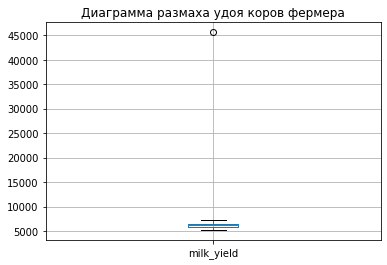

count      629.0
mean      6188.8
std       1644.8
min       5204.0
25%       5751.0
50%       6133.0
75%       6501.0
max      45616.0
Name: milk_yield, dtype: float64

In [27]:
desription(data_farm, 
           'milk_yield', 
           title='Диаграмма размаха удоя коров фермера', 
           round_to=1)

In [28]:
data_farm.loc[data_farm['milk_yield'] > 20000, :]

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,dads_breed,fat_content,protein,tasty_milk,over_to_years_old,dads_name
16,17,45616,11.5,1675,0.93,Vis Back Ideal,Холмистое,Ideal,3.22,3.076,True,True,Буйный


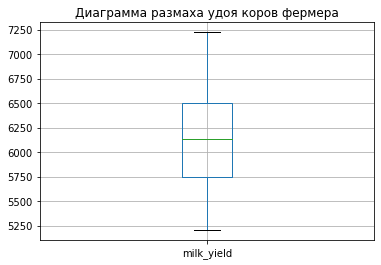

count     628.0
mean     6126.0
std       475.9
min      5204.0
25%      5749.8
50%      6132.5
75%      6501.0
max      7222.0
Name: milk_yield, dtype: float64

In [29]:
desription(data_farm.loc[data_farm['milk_yield'] < 20000, :], 
           'milk_yield', 
           title='Диаграмма размаха удоя коров фермера', 
           round_to=1)

<hr>
По диаграмме размаха и числовому описанию видно, что почти все коровы (кроме одной) дают от 5.2 до 7.3 тонн молока в год, половина коров дает от 5.75 до 6.5 тонн молока в год. В среднем корова с фермы дает около 6.2 тонн молока в год.

У фермера есть одна корова рекордсмен, она дает 45.6 тонн молока в год, по информации из интернета, это возможно (известный рекорд пренадлежит Кубинской корове, которая за один год дала более 41 тысячи литров молока - ~42.2 тонны). 

Уберем эту корову из выборки, потому что есть всего одно такое аномальное значение и выявить зависимости для покупки такой же одаренной коровы - не получится, при этом она может сильно исказить данные. Скопируем исходный фрейм в <b>full_data_farm</b>, чтобы оставить доступ к удаляемым значениям.
<hr>

In [30]:
full_data_farm = data_farm.copy()

In [31]:
data_farm = data_farm.loc[data_farm['milk_yield'] < 20000, :]

<hr>
Построим график распределения удоев коров.
<hr>

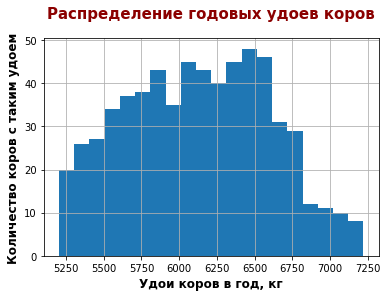

In [32]:
hist_plot(data_farm, 
          'milk_yield', 
          bins=20, 
          xlabel='Удои коров в год, кг', 
          ylabel='Количество коров с таким удоем', 
          title='Распределение годовых удоев коров')

<hr>
По графику распределния можно сказать, что распределение годовых удоев коров стремится к нормальному. 
<hr>

 - <i> Признак показателя питательности корма коровы - energy_feed_unit</i>
 
<hr>

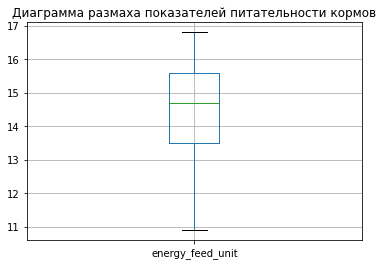

count    628.0
mean      14.5
std        1.3
min       10.9
25%       13.5
50%       14.7
75%       15.6
max       16.8
Name: energy_feed_unit, dtype: float64

In [33]:
desription(data_farm, 
           'energy_feed_unit', 
           title='Диаграмма размаха показателей питательности кормов', 
           round_to=1)

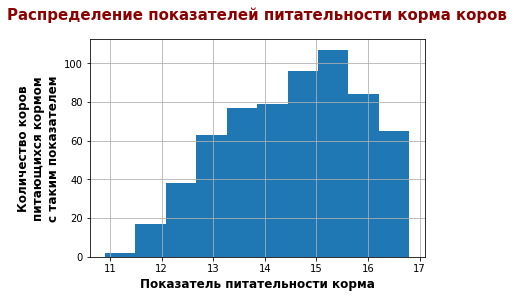

In [34]:
hist_plot(data_farm, 
          'energy_feed_unit', 
          bins=10, 
          xlabel='Показатель питательности корма', 
          ylabel='Количество коров\nпитающихся кормом\nс таким показателем', 
          title='Распределение показателей питательности корма коров')

<hr>
По графикам и числовому описанию можно увидеть, что коровы фермера в основном питаются кормами с повышенным показателем питательности. Среднее значение показателей - 14.5, медианное значение достаточно близко к нему. График распределения имеет нормальную форму, со смещением в сторону повышенных показателей. Половина коров питается кормами с показателями в диапазоне 13.5 - 15.6.
<hr>

 - <i> Признак количества сырого протеина в корме коровы - crude_protein</i>

<hr>

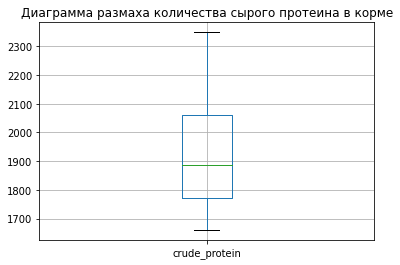

count     628.0
mean     1923.8
std       182.8
min      1660.0
25%      1771.8
50%      1888.0
75%      2062.2
max      2349.0
Name: crude_protein, dtype: float64

In [35]:
desription(data_farm, 
           'crude_protein', 
           title='Диаграмма размаха количества сырого протеина в корме', 
           round_to=1)

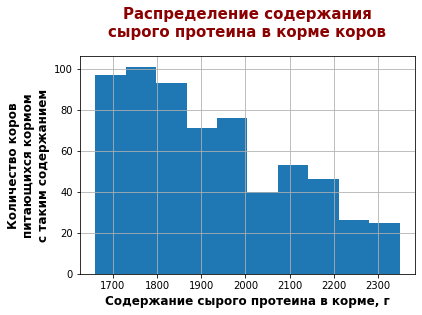

In [36]:
hist_plot(data_farm, 
          'crude_protein', 
          bins=10, 
          xlabel='Содержание сырого протеина в корме, г', 
          ylabel='Количество коров\nпитающихся кормом\nс таким содержанием', 
          title='Распределение содержания\nсырого протеина в корме коров')

<hr>
По графикам и числовому описанию можно увидеть, что коровы фермера в основном питаются кормами с пониженным содержанием сырого протеина. Среднее и медианное значение содержания около 1900 г. На графике распределения можно увидеть достаточно линейную зависимость, чем больше в корме содержится сырого протеина - тем меньшему количеству коров дают этот корм. Коровы питаются кормами с содержанием сырого протеина от 1660 г до 2350 г, половина всех коров едят корма с содержанием сырого протеина в диапазоне 1770 - 2060 г.
<hr>

 - <i> Признак отношения сахара к протеину в корме коровы - sugar_protein_ratio</i>

<hr>

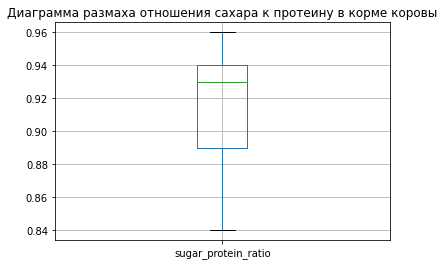

count    628.000
mean       0.913
std        0.032
min        0.840
25%        0.890
50%        0.930
75%        0.940
max        0.960
Name: sugar_protein_ratio, dtype: float64

In [37]:
desription(data_farm, 
           'sugar_protein_ratio', 
           title='Диаграмма размаха отношения сахара к протеину в корме коровы', 
           round_to=3)

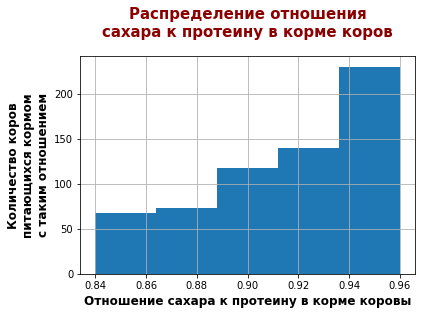

In [38]:
hist_plot(data_farm, 
          'sugar_protein_ratio', 
          bins=5, 
          xlabel='Отношение сахара к протеину в корме коровы', 
          ylabel='Количество коров\nпитающихся кормом\nс таким отношением', 
          title='Распределение отношения\nсахара к протеину в корме коров')

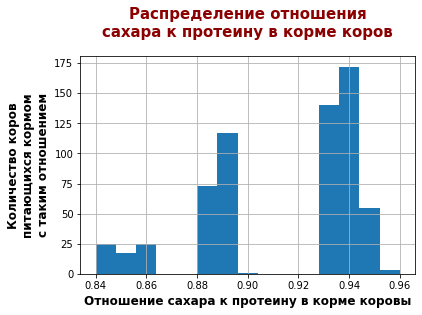

In [39]:
hist_plot(data_farm, 
          'sugar_protein_ratio', 
          bins=15, 
          xlabel='Отношение сахара к протеину в корме коровы', 
          ylabel='Количество коров\nпитающихся кормом\nс таким отношением', 
          title='Распределение отношения\nсахара к протеину в корме коров')

<hr>
По графикам и числовому описанию можно увидеть, что коровы фермера в основном питаются кормами с высоким отношением сахара к протеину (СПО - сахаро-протеиновое соотношение). Среднее значение отношения - 0.913, а медианное - 0.930. На графике распределения можно увидеть достаточно линейную зависимость, чем меньше в корме отношение сахара к протеину - тем меньшему количеству коров дают этот корм. Коровы питаются кормами с СПО от 0.84 до 0.96, половина всех коров едят корма с СПО в диапазоне 0.89 - 0.94 г.

На более мелком интервале отношений можно заметить, что выделены 3 группы коров по отношенияю сахара к протеину в корме. По всей видимости у фермера есть три группы коров, которым он дает корма с "низким СПО" - интервал 0.84-0.863, "средним СПО" - интервал 0.88-0.9 и "высоким СПО" - интервал 0.93-0.96.

По графику видно, что распределение - не нормальное.
<hr>

 - <i> Признак породы коровы - breed</i>
 - <i> Признак ландшафта лугов, на которых паслись коровы - pasture_type</i>
 - <i> Признак породы папы коровы - dads_breed</i>
<hr>

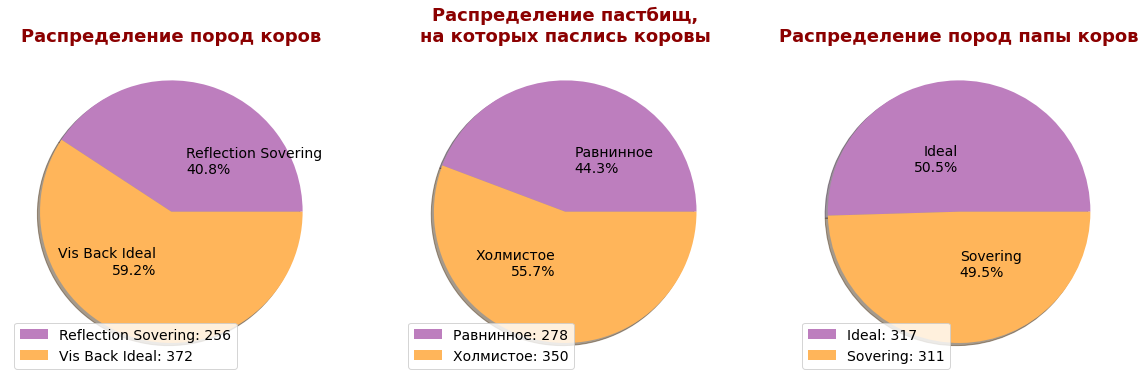

In [40]:
fig = plt.figure(figsize=(20, 8))

fig.add_subplot(1, 3, 1)
pie_plot(data_farm, 
         'breed', 
         title='Распределение пород коров', 
         labeldistance=0.4)

fig.add_subplot(1, 3, 2)
pie_plot(data_farm, 
         'pasture_type', 
         title='Распределение пастбищ,\nна которых паслись коровы', 
         labeldistance=0.4)

fig.add_subplot(1, 3, 3)
pie_plot(data_farm, 
         'dads_breed', 
         title='Распределение пород папы коров', 
         labeldistance=0.4)

plt.show()

<hr>
На ферме встречаются коровы двух пород - <i>Reflection Sovering</i> и <i>Vis Back Ideal</i>. Их соотношение на ферме 40.8% (256 коров) и 59.2% (372 коровы) соответственно.

Паслись коровы либо на равнинах, таких коров у фермера 278, что составляет 44.3%, либо в холмах, таких коров у фермера 350, что составляет 55.7% от общего числа коров.

Породы пап коров встречаются такие как <i>Ideal</i>, коров, чьи папы имеют такую породу - 317 (50.5%), а также <i>Sovering</i>, таких коров - 311 (49.5%).
<hr>

 - <i> Признак жирности молока - fat_content</i>

<hr>

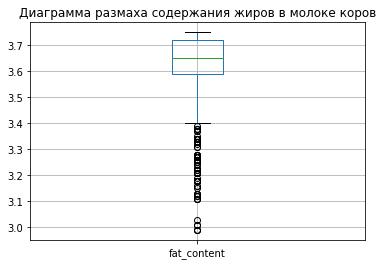

count    628.00
mean       3.60
std        0.17
min        2.99
25%        3.59
50%        3.65
75%        3.72
max        3.75
Name: fat_content, dtype: float64

In [41]:
desription(data_farm, 
           'fat_content', 
           title='Диаграмма размаха содержания жиров в молоке коров', 
           round_to=2)

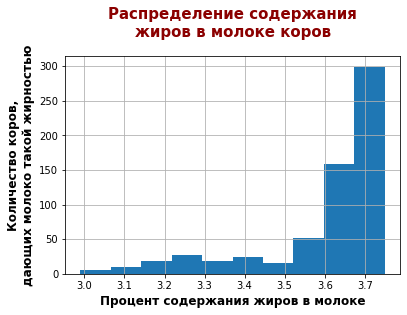

In [42]:
hist_plot(data_farm, 
          'fat_content', 
          bins=10, 
          xlabel='Процент содержания жиров в молоке', 
          ylabel='Количество коров,\nдающих молоко такой жирностью', 
          title='Распределение содержания\nжиров в молоке коров')

<hr>
По графикам и числовому описанию можно увидеть, что коровы фермера дают молоко, содержащее то 2.99% до 3.75%. Большая часть коров дает молоко жирностью 3.4% - 3.75%. В среднем корова дает молоко жирностью 3.65%.
<hr>

 - <i> Признак содержания протеина в молоке - protein</i>

<hr>

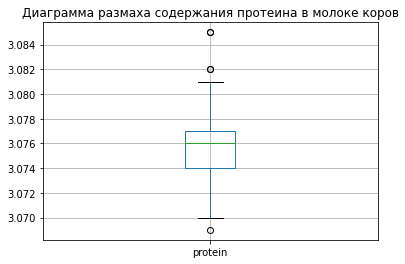

count    628.000
mean       3.076
std        0.003
min        3.069
25%        3.074
50%        3.076
75%        3.077
max        3.085
Name: protein, dtype: float64

In [43]:
desription(data_farm, 
           'protein', 
           title='Диаграмма размаха содержания протеина в молоке коров', 
           round_to=3)

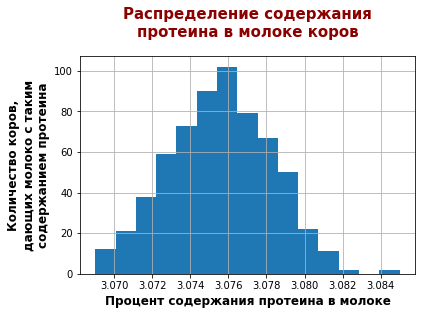

In [44]:
hist_plot(data_farm, 
          'protein', 
          bins=15, 
          xlabel='Процент содержания протеина в молоке', 
          ylabel='Количество коров,\nдающих молоко с таким\nсодержанием протеина', 
          title='Распределение содержания\nпротеина в молоке коров')

<hr>
По графикам и числовому описанию можно увидеть, что коровы фермера дают молоко, содержащее от 3.07% до 3.09% протеина. График имеет вид нормального распределения, а также очень маленькое стандартное отклонение, значения содержания протеина в молоке очень близки у всех коров и стремятся к значению 3.08%.
<hr>

 - <i> Признак субъективной оценки вкуса молока - tasty_milk</i>
 - <i> Признак возраста коровы - over_to_years_old</i>
 - <i> Признак отца коровы - dads_name</i>
 
<hr>

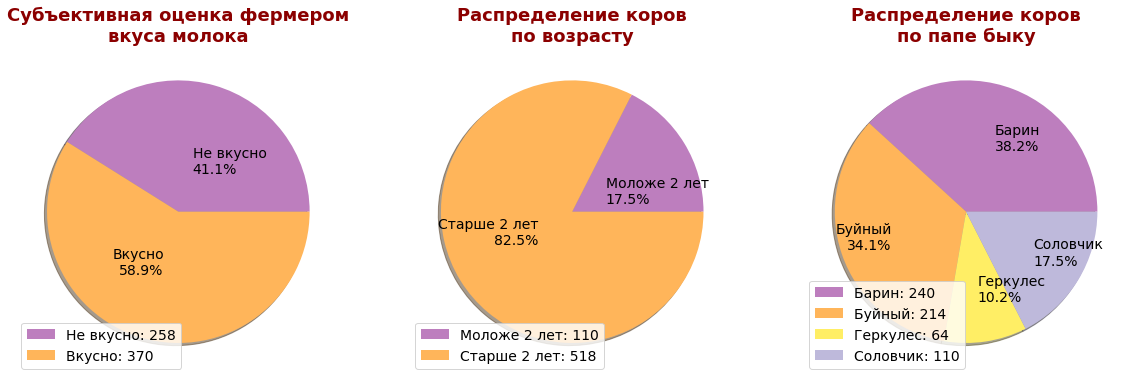

In [45]:
fig = plt.figure(figsize=(20, 8))

fig.add_subplot(1, 3, 1)
pie_plot(data_farm, 
         'tasty_milk', 
         title='Субъективная оценка фермером\nвкуса молока', 
         labeldistance=0.4,
         new_labels={'True':'Вкусно', 'False':'Не вкусно'})

fig.add_subplot(1, 3, 2)
pie_plot(data_farm, 
         'over_to_years_old', 
         title='Распределение коров\nпо возрасту', 
         labeldistance=0.3,
         new_labels={'True':'Старше 2 лет', 'False':'Моложе 2 лет'})

fig.add_subplot(1, 3, 3)
pie_plot(data_farm, 
         'dads_name', 
         title='Распределение коров\nпо папе быку', 
         labeldistance=0.6)

plt.show()

<hr>
По мнению фермера 370 его коров, что составляет 58.9% от всех коров, дают вкусное молоко, оставшиеся 258 коров - 41.1%, дают молоко, которое фермер не считает вкусным.

В основном коровы фермера старше 2 лет, таких коров 518 (82.5%), коров моложе 2 лет - 110 (17.5%).

Большая часть коров родилась от быков по имени <i>Барин</i> и <i>Буйный</i>, таких коров 240 (38.2%) и 214 (34.1%) соответственно. Коров от быка <i>Соловчик</i> - 110 (17.5%) и от быка <i>Геркулес</i> - 64 (10.2%).
<hr>

<hr>
Теперь посмотрим на признаки коров, которых предлагает на продажу "ЭкоФерма" из фрейма <b>data_farm</b>.
<hr>

Посмотрим на качественные признаки:

 - <i> Признак породы коровы - breed</i>
 - <i> Признак ландшафта лугов, на которых паслись коровы - pasture_type</i>
 - <i> Признак породы папы коровы - dads_breed</i>
 - <i> Признак отца коровы - dads_name</i>
 - <i> Признак возраста коровы - over_to_years_old</i>

<hr>

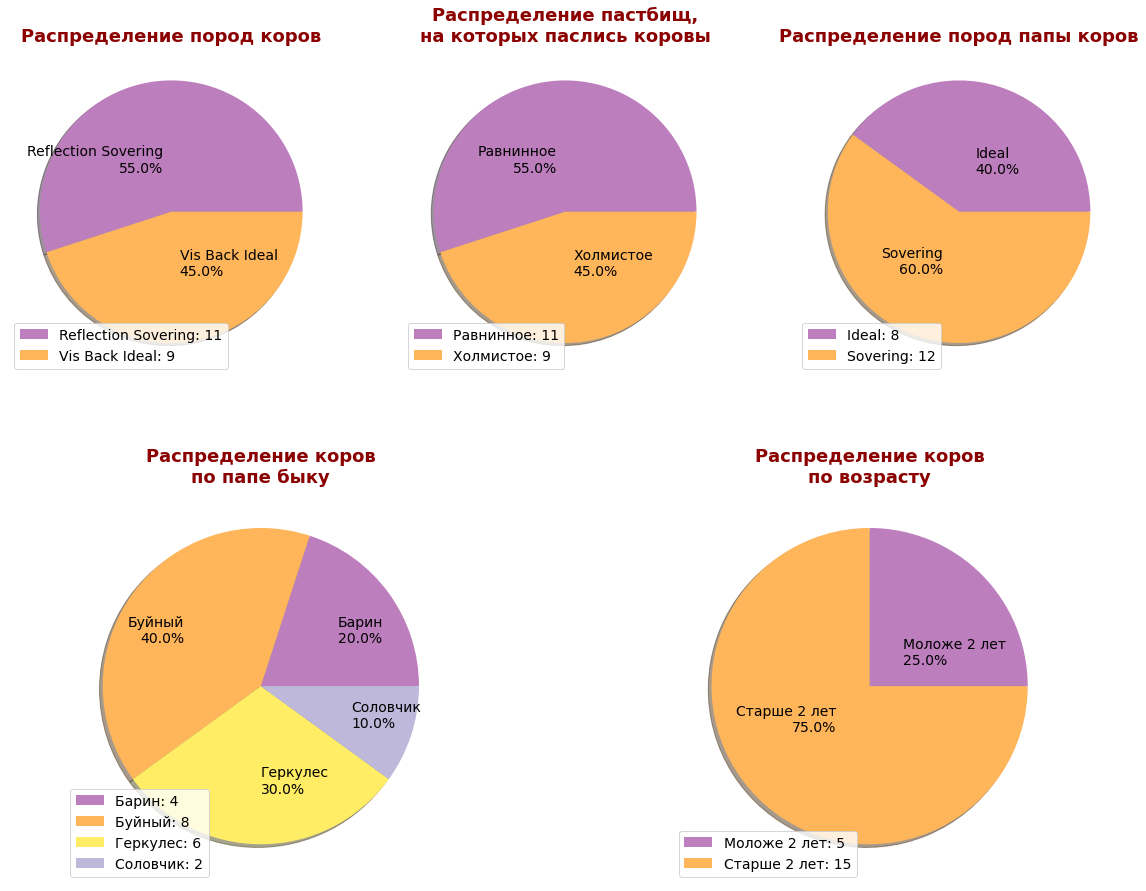

In [46]:
fig = plt.figure(figsize=(20, 16))

fig.add_subplot(2, 3, 1)
pie_plot(data_eco_farm, 
         'breed', 
         title='Распределение пород коров', 
         labeldistance=0.4)

fig.add_subplot(2, 3, 2)
pie_plot(data_eco_farm, 
         'pasture_type', 
         title='Распределение пастбищ,\nна которых паслись коровы', 
         labeldistance=0.4)

fig.add_subplot(2, 3, 3)
pie_plot(data_eco_farm, 
         'dads_breed', 
         title='Распределение пород папы коров', 
         labeldistance=0.4)

fig.add_subplot(2, 2, 3)
pie_plot(data_eco_farm, 
         'dads_name', 
         title='Распределение коров\nпо папе быку', 
         labeldistance=0.6)

fig.add_subplot(2, 2, 4)
pie_plot(data_eco_farm, 
         'over_to_years_old', 
         title='Распределение коров\nпо возрасту', 
         labeldistance=0.3,
         new_labels={'True':'Старше 2 лет', 'False':'Моложе 2 лет'})

plt.show()

<hr>
На продажу представленны коровы двух пород - Reflection Sovering и Vis Back Ideal. Количество обеих пород одинаково по 8 коров каждой коровы.

Паслись продаваемые коровы либо на равнинах, либо в холмах, их также поровну.

Породы пап коров встречаются такие как Ideal и Sovering, их соотношение 37.5% - 6 коров и 62.5% - 10 коров.

Большая часть коров родилась от быков по имени <i>Буйный</i> и <i>Геркулес</i>, таких коров 7 (43.8%) и 5 (31.2%) соответственно. Коров от быков <i>Соловчик</i> и <i>Барин</i> по 2 (12.5%).

В основном продаваемые коровы старше 2 лет, таких коров 11 (68.8%), коров моложе 2 лет - 5 (31.2%).
<hr>

 - <i> Признак текущей жирности молока - current_fat_content</i>
 
<hr>

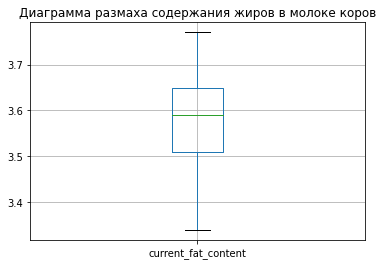

count    20.00
mean      3.58
std       0.13
min       3.34
25%       3.51
50%       3.59
75%       3.65
max       3.77
Name: current_fat_content, dtype: float64

In [47]:
desription(data_eco_farm, 
           'current_fat_content', 
           title='Диаграмма размаха содержания жиров в молоке коров', 
           round_to=2)

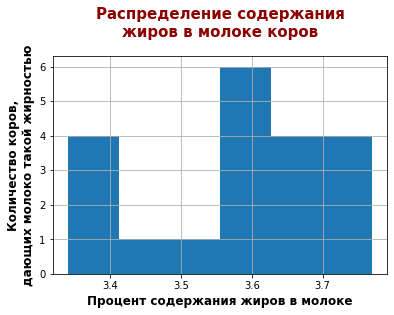

In [48]:
hist_plot(data_eco_farm, 
          'current_fat_content', 
          bins=6, 
          xlabel='Процент содержания жиров в молоке', 
          ylabel='Количество коров,\nдающих молоко такой жирностью', 
          title='Распределение содержания\nжиров в молоке коров')

<hr>
По графикам и числовому описанию можно увидеть, что продаваемые коровы дают молоко жирностью 3.34% - 3.77%. В среднем жирность молока составляет 3.57%. 
<hr>

 - <i> Признак текущего содержания протеина в молоке - current_protein</i>

<hr>

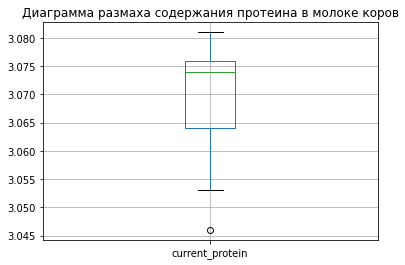

count    20.000
mean      3.070
std       0.010
min       3.046
25%       3.064
50%       3.074
75%       3.076
max       3.081
Name: current_protein, dtype: float64

In [49]:
desription(data_eco_farm, 
           'current_protein', 
           title='Диаграмма размаха содержания протеина в молоке коров', 
           round_to=3)

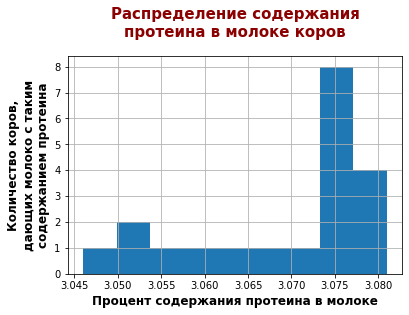

In [50]:
hist_plot(data_eco_farm, 
          'current_protein', 
          bins=9, 
          xlabel='Процент содержания протеина в молоке', 
          ylabel='Количество коров,\nдающих молоко с таким\nсодержанием протеина', 
          title='Распределение содержания\nпротеина в молоке коров')

<hr>
По графикам и числовому описанию можно увидеть, что коровы фермера дают молоко, содержащее от 3.05% до 3.08% протеина. График имеет маленькое стандартное отклонение, значения содержания протеина в молоке очень близки у всех коров.
<hr>

<hr>
<font size=4.5><b>Итоги исследовательского анализа:</b></font>
<br><br>

<i>По результатам анализа данных о коровах <u>фермера</u>, получены следующие результаты:</i>

<b>Коровы</b> фермера имеют следующие характеристики:
 - Среди коров встречаются породы <i>Vis Back Ideal</i> и <i>Reflection Sovering</i> в соотношении 60 / 40;
 - Среди пород быков, которые являются отцами коров, встречаются <i>Ideal</i> и <i>Sovering</i> в соотношении 50 / 50;
 - Отношение коров, которым более 2 лет к коровам, которым менее 2 лет - 83 / 17;
 
<b>Корм</b>, которым фермер кормит коров, имеет следующие характеристики:
 - Медианное значение энергетической кормовой единицы (ЭКЕ) - 14.7. Все значения ЭКЕ укладываются в диапазон 10.9 - 16.8;
 - Медианное значение содержания сырого протеина в корме - 1890 г. Содержание сырого протеина в корме варьируется от 1660 г до 2350 г. В основном коровы получают корм с низким содержанием сырого протеина;
 - Медианное значение сахаро-протеинового соотношения (СПО) в корме - 0.93, диапазон 0.84 - 0.96. Вероятно фермер разделяет коров на группы с "низким СПО", "средним СПО" и "высоким СПО" в корме. Бόльшая часть коров получает корм с "выоским СПО";
 
<b>Тип пастбищ</b>, на которых коровы фермера паслись, имеет следующие характеристики:
 - Все коровы паслись или на холмистой местности или на равнине, соотношение холмистых пастбищ к равнинным - 56 / 44;
 
<b>Молоко</b>, которое давали коровы фермера, имеет следующие характеристики:
 - Медианное значение удоев коров - 6.1 тонна в год. Все коровы дают от 5.2 до 7.2 тонн молока в год. График распределения удоев стремится к нормальному распределению;
 - В среднем жирность молока - 3.7%. В основном коровы дают молоко жирностью 3.4% - 3.8%, но есть несколько коров, которые дают молоко, содержащее от 3% до 3.4%;
 - Среднее значение содержания протеина в молоке коров - 3.076%. Все коровы дают молоко с содержанием протеина очень близким к среднему, отклонения не превышают 0.01%;
 - По субъективной оченке фермера, 59% коров дают вкусное молоко, остальные 41% коров не оправдывают ожидания фермера;
<br><br><br>

<i>По результатам анализа данных о <u>продаваемых</u> коровах, получены следующие результаты:</i>
 
Продаваемые <b>коровы</b> имеют следующие характеристики:
 - Половина продаваемых коров породы <i>Vis Back Ideal</i> и другая половина порода <i>Reflection Sovering</i>;
 - Среди пород быков, которые являются отцами коров, встречаются <i>Ideal</i> и <i>Sovering</i> в соотношении 38 / 62;
 - Отношение коров, которым более 2 лет к коровам, которым менее 2 лет - 69 / 31;

<b>Тип пастбищ</b>, на которых продаваемые коровы паслись, имеет следующие характеристики:
 - Половина продаваемых коров паслась на холмистой местности и половина на равнине;

<b>Молоко</b>, которое давали продаваемые коровы, имеет следующие характеристики:
 - Коровы дают молоко жирностью 3.34% - 3.77%, в среднем жирность молока - 3.57%;
 - Медианное значение содержания протеина в молоке коров - 3.074%. Все коровы дают молоко с очень близким содержанием протеина, в диапазоне 3.046% - 3.081%;
<br><br><br>

Количество коров в выборке достаточно маленькое - всего 16 штук, поэтому нельзя говорить, о том, что продаваемые коровы ассоциацией "ЭкоФерма", не входящие в данную выборку, будут соответствовать полученным характеристикам.

По результатам можно сказать, что коровы предложенные для покупки вполне соответствуют характеристикам коров, которыми владеет фермер:

 - Породы продаваемых коров совпадают с породами фермерских; 
 - Породы отцов коров также совпадают; 
 - Продаваемые коровы представленны как возрастные (старше 2 лет), так и молодые (младше двух лет); 
 - Паслись продаваемые коровы на схожих ландшафтах;
 - Характеристики молока (жирность и содержание протеина) продаваемых коров отличаются от фермерских показателей на доли процентов;

При покупке этих 16-ти коров, характеристики всего стада фермера изменятся несильно.
<hr>

 <a id='corr_analysis'></a>

## Корреляционный анализ

In [51]:
def cor_heatmap(df: pd.DataFrame, 
                parameters: list[str], 
                is_qualitative: bool = False,
                figsize: tuple[int] = (10, 10)) -> None:
    '''Heatmap of the correlation matrix (df[parameters])'''
    
    if is_qualitative:
        types = data_farm.dtypes.reset_index()
        types.columns = ['index', 'type']
        quantitive = list(types.loc[(types['type'] == 'int64') | (types['type'] == 'float64'), 'index'])
        data_corr = df[parameters].phik_matrix(quantitive)
    else:
        data_corr = df[parameters].corr(method='spearman')
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(data_corr, dtype=bool))
    sns.heatmap(data_corr, 
                annot=True, 
                cmap=sns.color_palette("Blues",12),
                mask=mask) 
    plt.show()

In [52]:
def scatter_plot(df: pd.DataFrame, parameter: str, target: str, 
                 alpha: float = 0.4, 
                 title: str = None, xlabel: str = None, ylabel: str = None) -> tuple:
    '''Creation scatter plots'''
    
    sorted_data = df.sort_values(target)
    ax = plt.scatter(sorted_data[parameter], 
                     sorted_data[target], 
                     alpha=alpha)
    plt.title(title, 
              size=15, 
              weight='bold', 
              pad=20, 
              color='DarkRed')
    plt.xlabel(xlabel, 
               size=12,
               weight='bold')
    plt.ylabel(ylabel, 
               size=12,
               weight='bold')
    plt.grid()
    return ax

In [53]:
def scatter_plots_for_cat_par(df: pd.DataFrame, cat_params: list[str], 
                              parameter: str, target: str = 'milk_yield', alpha: float = 0.4, 
                              mask: dict[str] = dict()) -> None:
    '''Creation scatter plots for different categorical parameters (cat_params)'''
    
    fig = plt.figure(figsize=(20, 25))
    for i, cat in enumerate(cat_params, 1):
        fig.add_subplot(2, 3, i)
        for value in df[cat].unique():
            data = df.loc[df[cat] == value, :]
            scatter_plot(data, 
                         parameter=parameter, 
                         target=target, 
                         title=f'''Зависимость Удоя от показателя:\n{mask[parameter]}
с разбивкой по признаку {mask[cat]}''', 
                         xlabel=mask[parameter], 
                         ylabel='Удой коров, кг')
        plt.grid()
        if cat == 'tasty_milk':
            plt.legend(['Вкусное', 'Не вкусное'])
        elif cat == 'over_to_years_old':
            plt.legend(['Более 2 лет', 'Менее 2 лет'])
        else:
            plt.legend(df[cat].unique())
    plt.show()


In [54]:
def linear_plots_for_cat_par(df: pd.DataFrame, cat_params: list[str], 
                              parameter: str, target: str = 'milk_yield', alpha: float = 1.0, 
                              mask: dict[str] = dict()) -> None:
    '''Creation Linear plots with standart duration for different categorical parameters (cat_params)'''
    
    fig = plt.figure(figsize=(20, 35))
    for i, cat in enumerate(cat_params, 1):
        ax = fig.add_subplot(3, 2, i)
        sns.lineplot(x=parameter,
                     y=target,
                     ci='sd',
                     hue=cat,
                     data=df)
        ax.set_title(f'''Зависимость Удоя от показателя:\n{mask[parameter]}\n с разбивкой по признаку {mask[cat]}''', 
                      size=15, 
                      weight='bold', 
                      pad=20, 
                      color='DarkRed')
        ax.set_xlabel(mask[parameter], 
                       size=12,
                       weight='bold')
        ax.set_ylabel('Удой коров, кг', 
                       size=12,
                       weight='bold')
        ax.grid()
        if cat == 'tasty_milk':
            ax.legend(['Не вкусное', 'Вкусное'])
        elif cat == 'over_to_years_old':
            ax.legend(['Менее 2 лет', 'Более 2 лет'])
    plt.show()

<hr>
В данном разделе будем работать с данными из фрейма <b>data_farm</b>. Посмотрим на коэффициенты корреляции Спирмана между количественными признаками.
<hr>

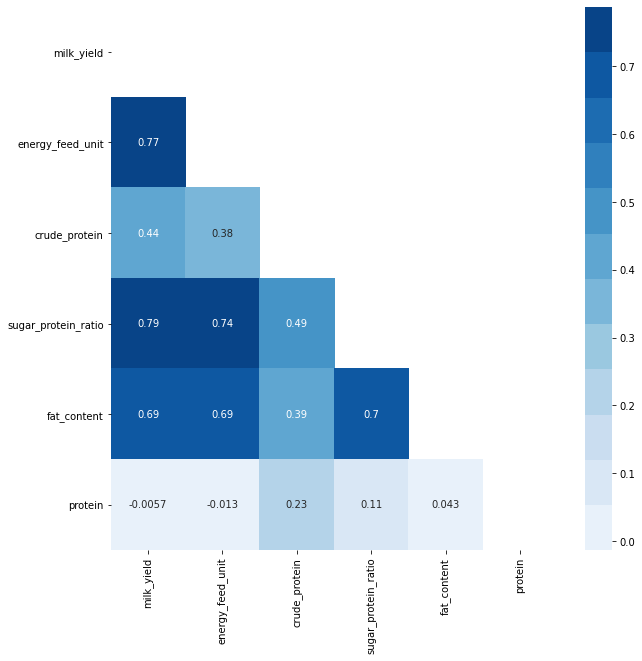

In [55]:
cor_heatmap(data_farm, 
            parameters=['milk_yield', 
                        'energy_feed_unit', 
                        'crude_protein', 
                        'sugar_protein_ratio', 
                        'fat_content', 
                        'protein'], 
            is_qualitative=False,
            figsize=(10, 10))

<hr>
Посмотрим также на коэффициенты корреляции Фи между всеми переменными.
<hr>

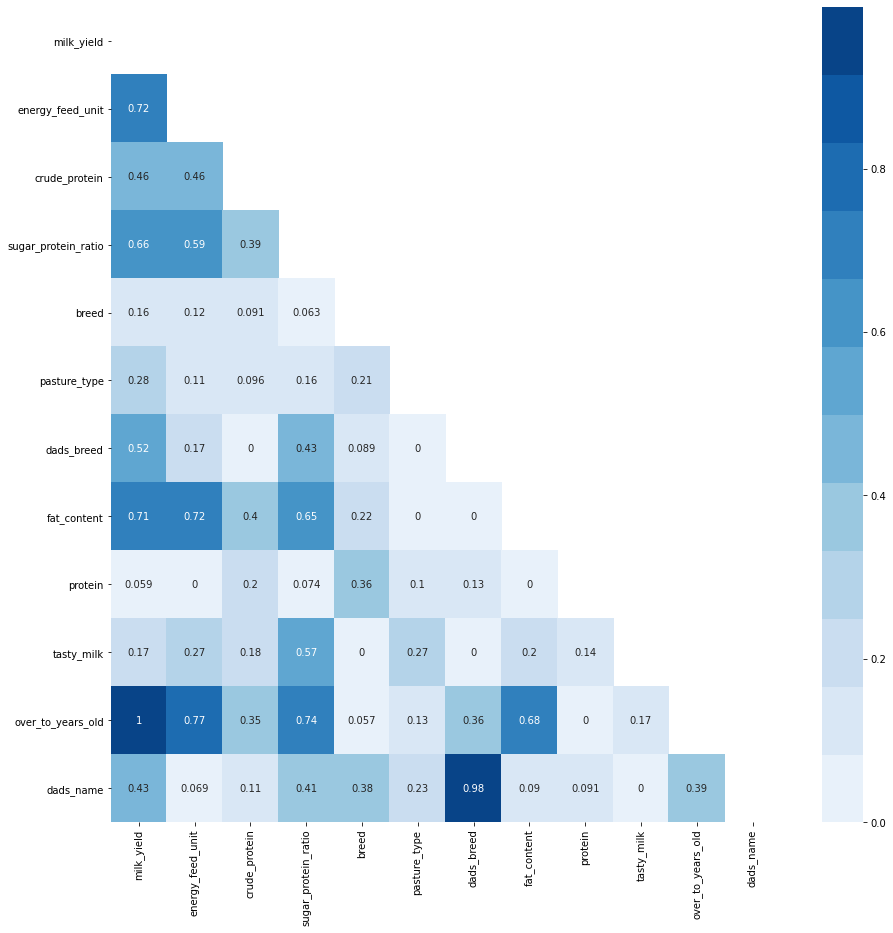

In [56]:
cor_heatmap(data_farm, 
            parameters=list(data_farm.columns)[1:], 
            is_qualitative=True,
            figsize=(15, 15))

<hr>
Коэффициенты корреляции, рассчитанные методом Спирмана  имеют значения больше, чем коэффициенты, рассчитанные методом Фи, это связано с тем что метод Фи хуже определяет корреляцию между непрерывными количественными признаками, поэтому будем ориентироваться на значения коэффициентов количсетвенных признаков, посчитанных методом Спирмана.
<br><br><br>
На кореляционной матрице <u>количественных</u> параметров наблюдаются следующие виды связи (по таблице Чеддока):

<i><font color='#21618C'>Высокую корреляционную связь имеют пары параметров:</font></i>
    
 - Удой (<b>milk_yield</b>) и Энергетическая кормовая единица (<b>energy_feed_unit</b>);
 - Удой (<b>milk_yield</b>) и Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>);
 - Энергетическая кормовая единица (<b>energy_feed_unit</b>) и Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>);
 
<i><font color='#3498DB '>Заметную корреляционную связь имеют пары параметров:</font></i>
    
 - Содержание жиров в молоке (<b>fat_content</b>) и Удой (<b>milk_yield</b>);
 - Содержание жиров в молоке (<b>fat_content</b>) и Энергетическая кормовая единица (<b>energy_feed_unit</b>);
 - Содержание жиров в молоке (<b>fat_content</b>) и Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>);
 
<i><font color='#85C1E9'>Умеренную корреляционную связь имеют пары параметров:</font></i>

 - Содержание сырого протеина в корме (<b>crude_protein</b>) и Удой (<b>milk_yield</b>);
 - Содержание сырого протеина в корме (<b>crude_protein</b>) и Энергетическая кормовая единица (<b>energy_feed_unit</b>);
 - Содержание сырого протеина в корме (<b>crude_protein</b>) и Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>);
 - Содержание сырого протеина в корме (<b>crude_protein</b>) и Содержание жиров в молоке (<b>fat_content</b>);
 
Оставшиеся пары количественных параметров имеют <font color='#AED6F1'>слабую</font> корреляционную связь.

<br><br>
На кореляционной матрице <u>качественных</u> параметров наблюдаются следующие виды связи (по таблице Чеддока):
 
<i><font color='#002D58 '>Весьма высокую корреляционную связь имеют пары параметров:</font></i>

 - Порода папы коровы (<b>dads_breed</b>) и Имя папы коровы (<b>dads_name</b>);
 - Удой (<b>milk_yield</b>) и Возраст коровы (<b>over_to_years_old</b>);
 
<i><font color='#21618C'>Высокую корреляционную связь имеют пары параметров:</font></i>

 - Возраст коровы (<b>over_to_years_old</b>) и Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>);
 - Возраст коровы (<b>over_to_years_old</b>) и Энергетическая кормовая единица (<b>energy_feed_unit</b>);

<i><font color='#3498DB'>Заметную корреляционную связь имеют пары параметров:</font></i>

 - Удой (<b>milk_yield</b>) и Порода папы коровы (<b>dads_breed</b>);
 - Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>) и Вкус молока (<b>tasty_milk</b>);
 - Содержание жиров в молоке (<b>fat_content</b>) и Возраст коровы (<b>over_to_years_old</b>);

<i><font color='#85C1E9'>Умеренную корреляционную связь имеют пары параметров:</font></i>

 - Порода папы коровы (<b>dads_breed</b>) и Сахаро-протеиновое соотношение (<b>sugar_protein_ratio</b>);
 - Порода папы коровы (<b>dads_breed</b>) и Возраст коровы (<b>over_to_years_old</b>);
 - Содержание протеина в молоке (<b>protein</b>) и Порода коровы (<b>breed</b>);
 - Содержание сырого протеина в корме (<b>crude_protein</b>) и Возраст коровы (<b>over_to_years_old</b>);
 
*Имя папы коровы (<b>dads_name</b>) имеет близкие коэфициенты корреляции к коэффициентам корреляции параметра Порода папы коровы (<b>dads_breed</b>), так как между ними высокая корреляционная связь, поэтому не будем отдельно описывать коэфициенты этого параметра. 
 
Оставшиеся пары качественных параметров имеют <font color='#AED6F1'>слабую</font> корреляционную связь.
 
<hr>

<hr>
Построим диаграммы рассеяния для признака Удой и всех количественных признаков с учётом значения категориальных признаков. Разделять значения по категориальным признакам будем цветом точек на графике.
<hr>

In [57]:
mask = {'energy_feed_unit':'Энергетическая кормовая единица', 
        'crude_protein':'Содержание сырого протеина в корме', 
        'sugar_protein_ratio':'Сахоро-протеиновое отношение', 
        'fat_content':'Жирность молока', 
        'protein':'Содержание протеина в молоке', 
        'breed':'Порода', 
        'pasture_type':'Тип пастбища', 
        'dads_breed':'Порода папы-быка', 
        'tasty_milk':'Вкуса молока', 
        'over_to_years_old':'Возраста коровы', 
        'dads_name':'Имя папы коровы'}
cat_params = ['breed', 'pasture_type', 'dads_breed', 'tasty_milk', 'over_to_years_old', 'dads_name']

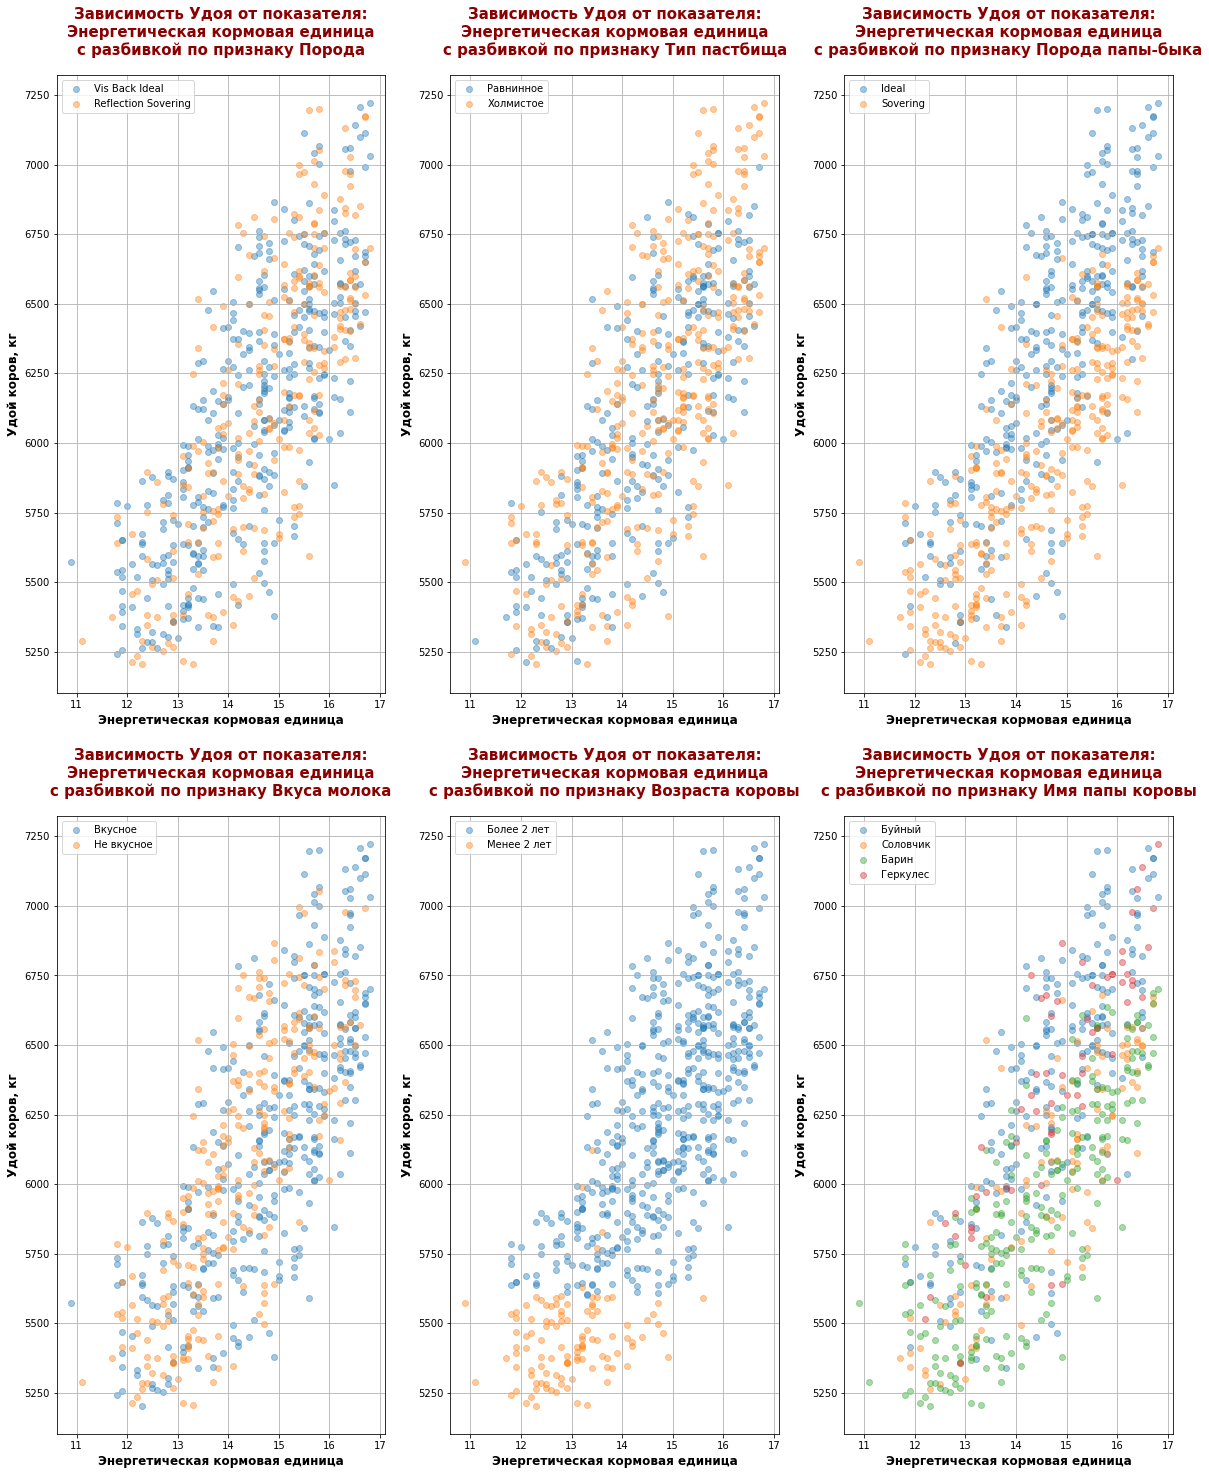

In [58]:
scatter_plots_for_cat_par(data_farm, 
                          cat_params=cat_params, 
                          parameter='energy_feed_unit', 
                          mask=mask)
plt.show()

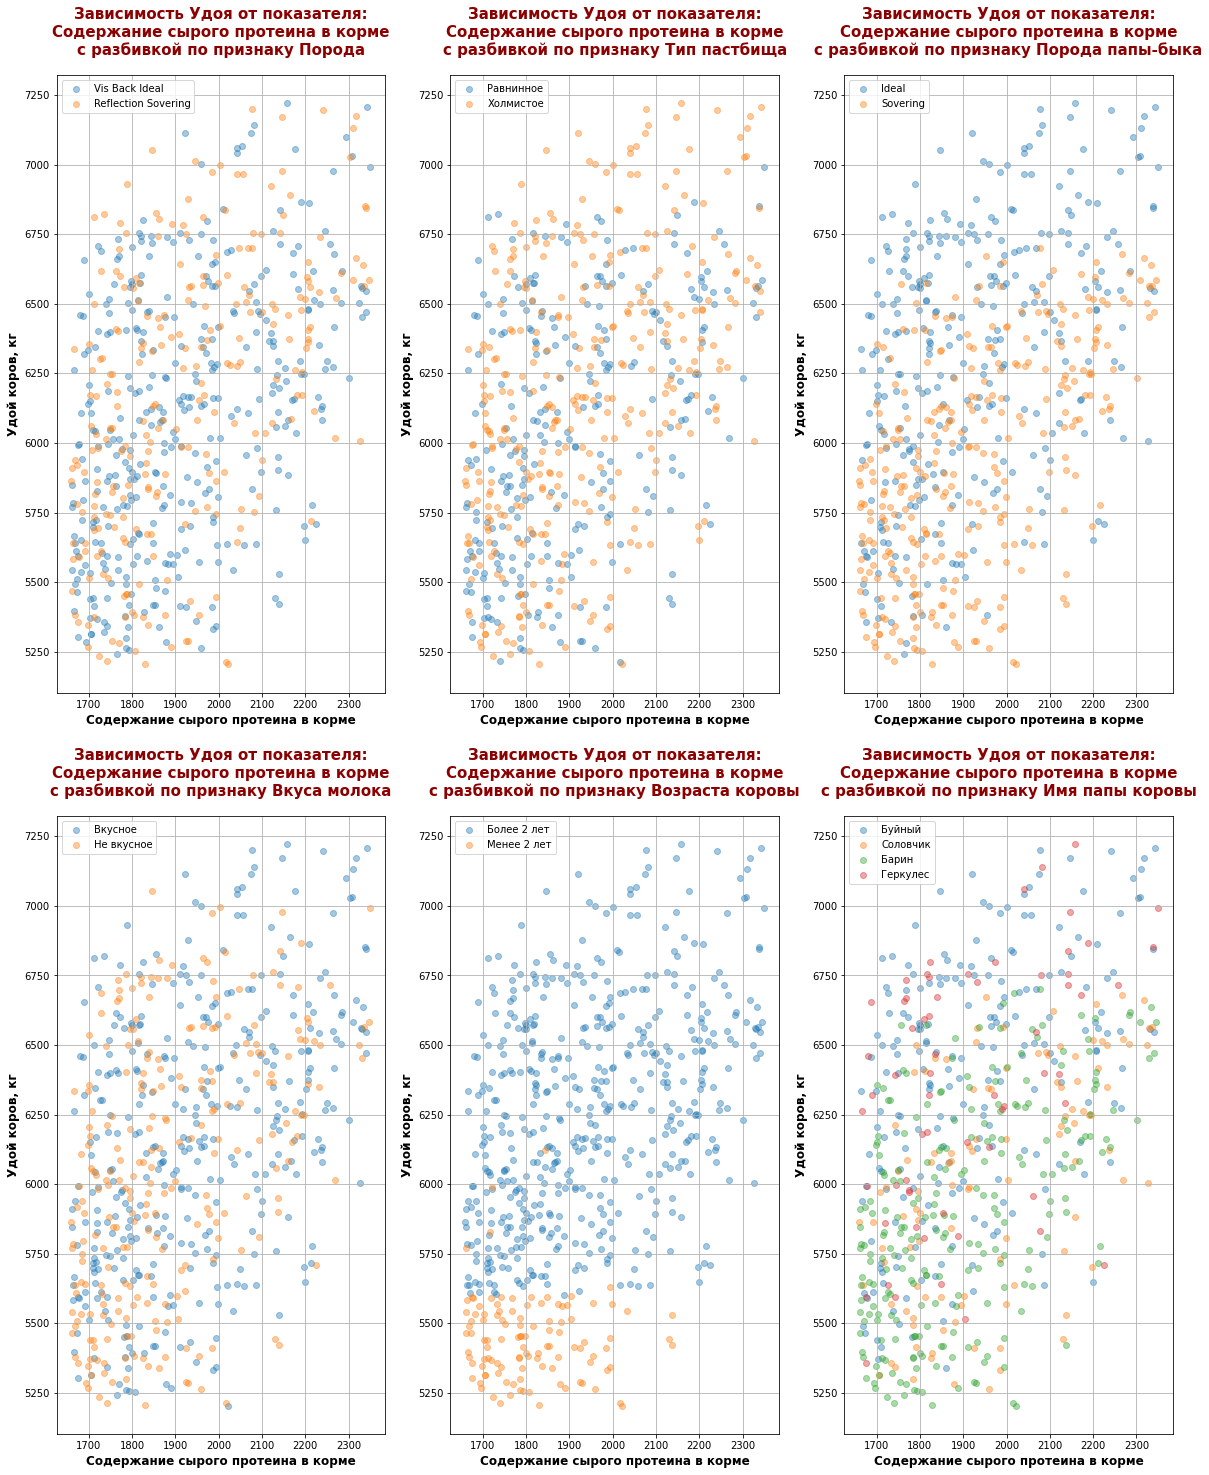

In [59]:
scatter_plots_for_cat_par(data_farm, 
                          cat_params=cat_params, 
                          parameter='crude_protein', 
                          mask=mask)
plt.show()

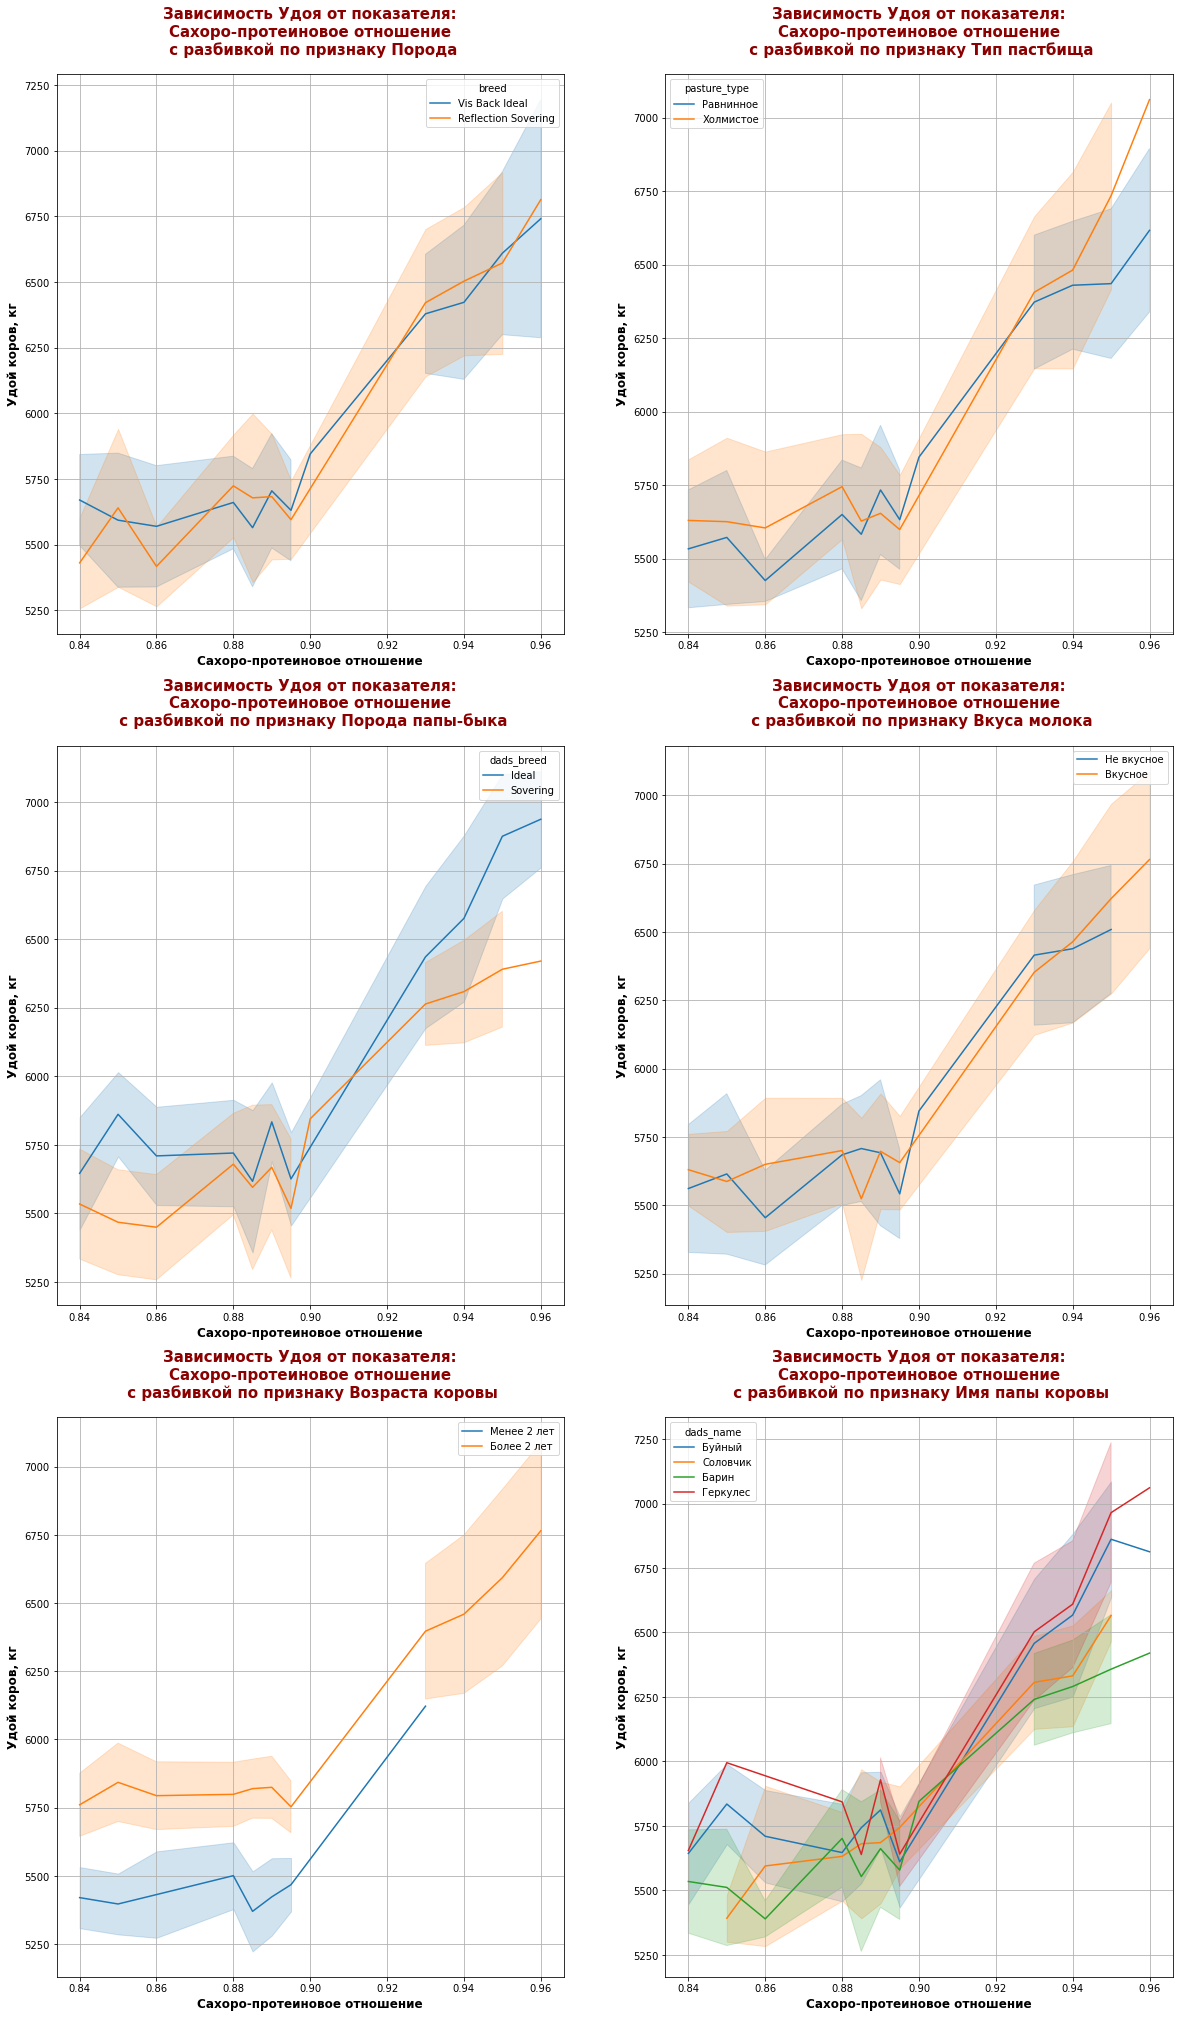

In [60]:
linear_plots_for_cat_par(data_farm, 
                         cat_params=cat_params, 
                         parameter='sugar_protein_ratio', 
                         mask=mask)
plt.show()

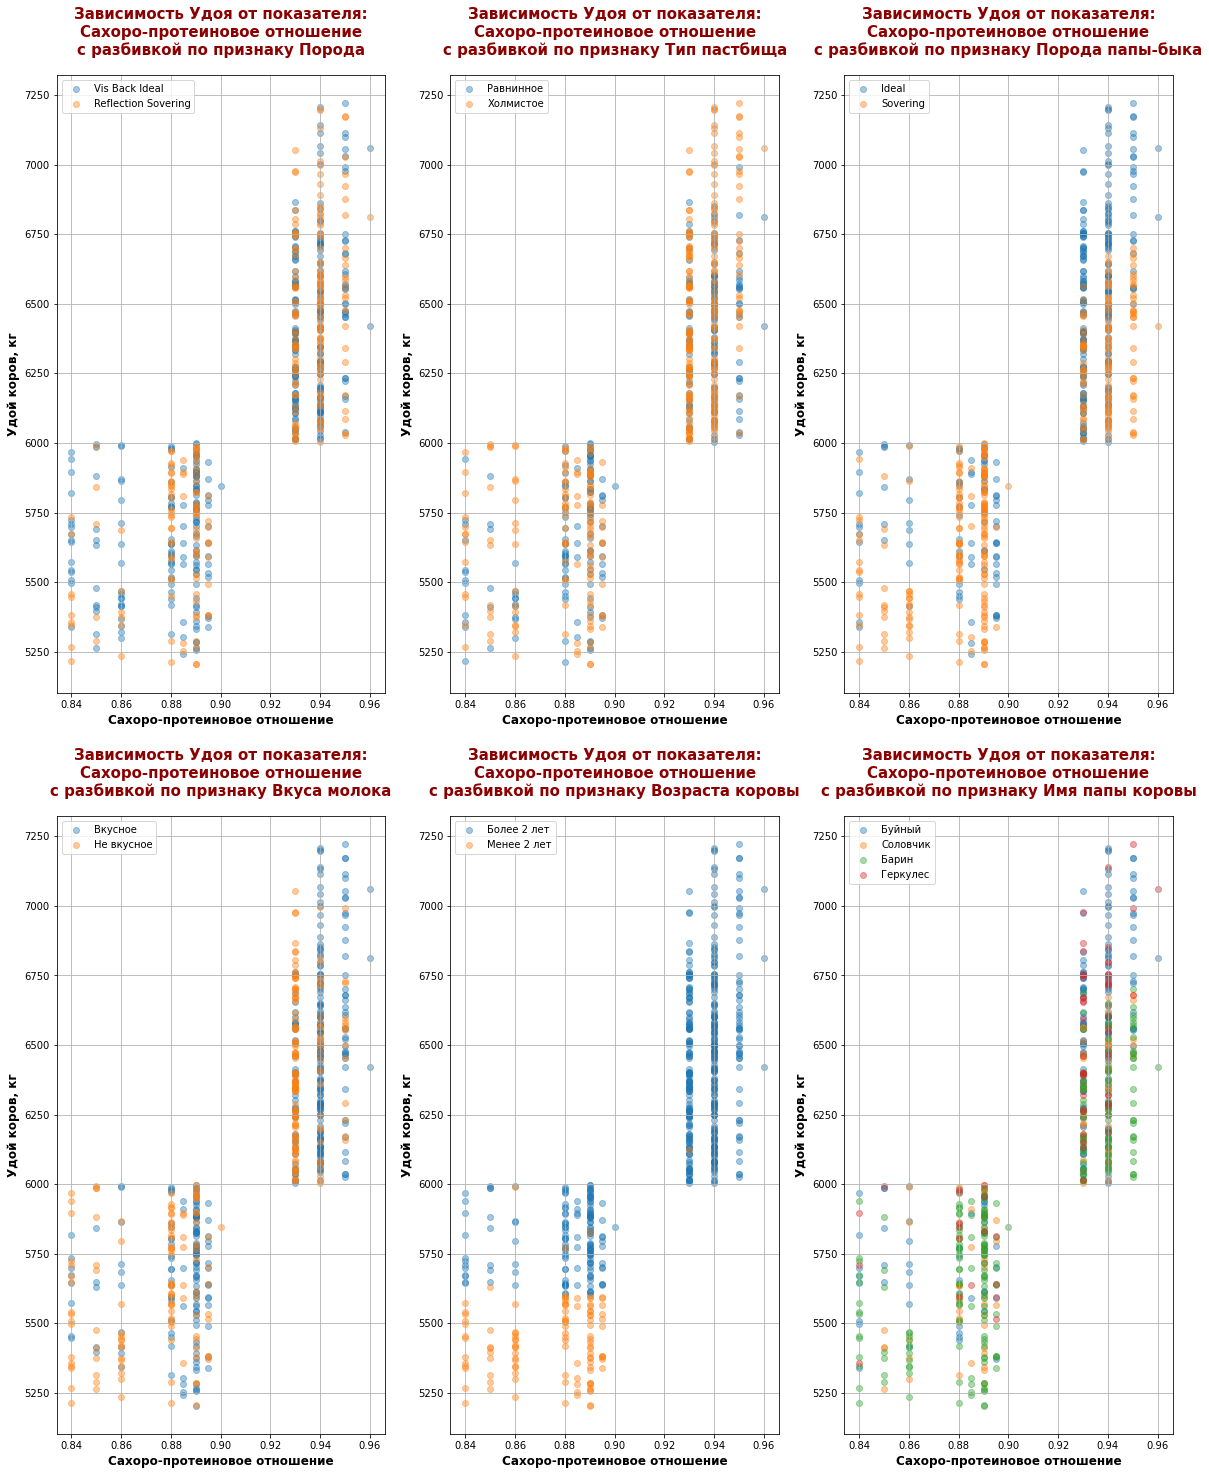

In [61]:
scatter_plots_for_cat_par(data_farm, 
                          cat_params=cat_params, 
                          parameter='sugar_protein_ratio', 
                          mask=mask)
plt.show()

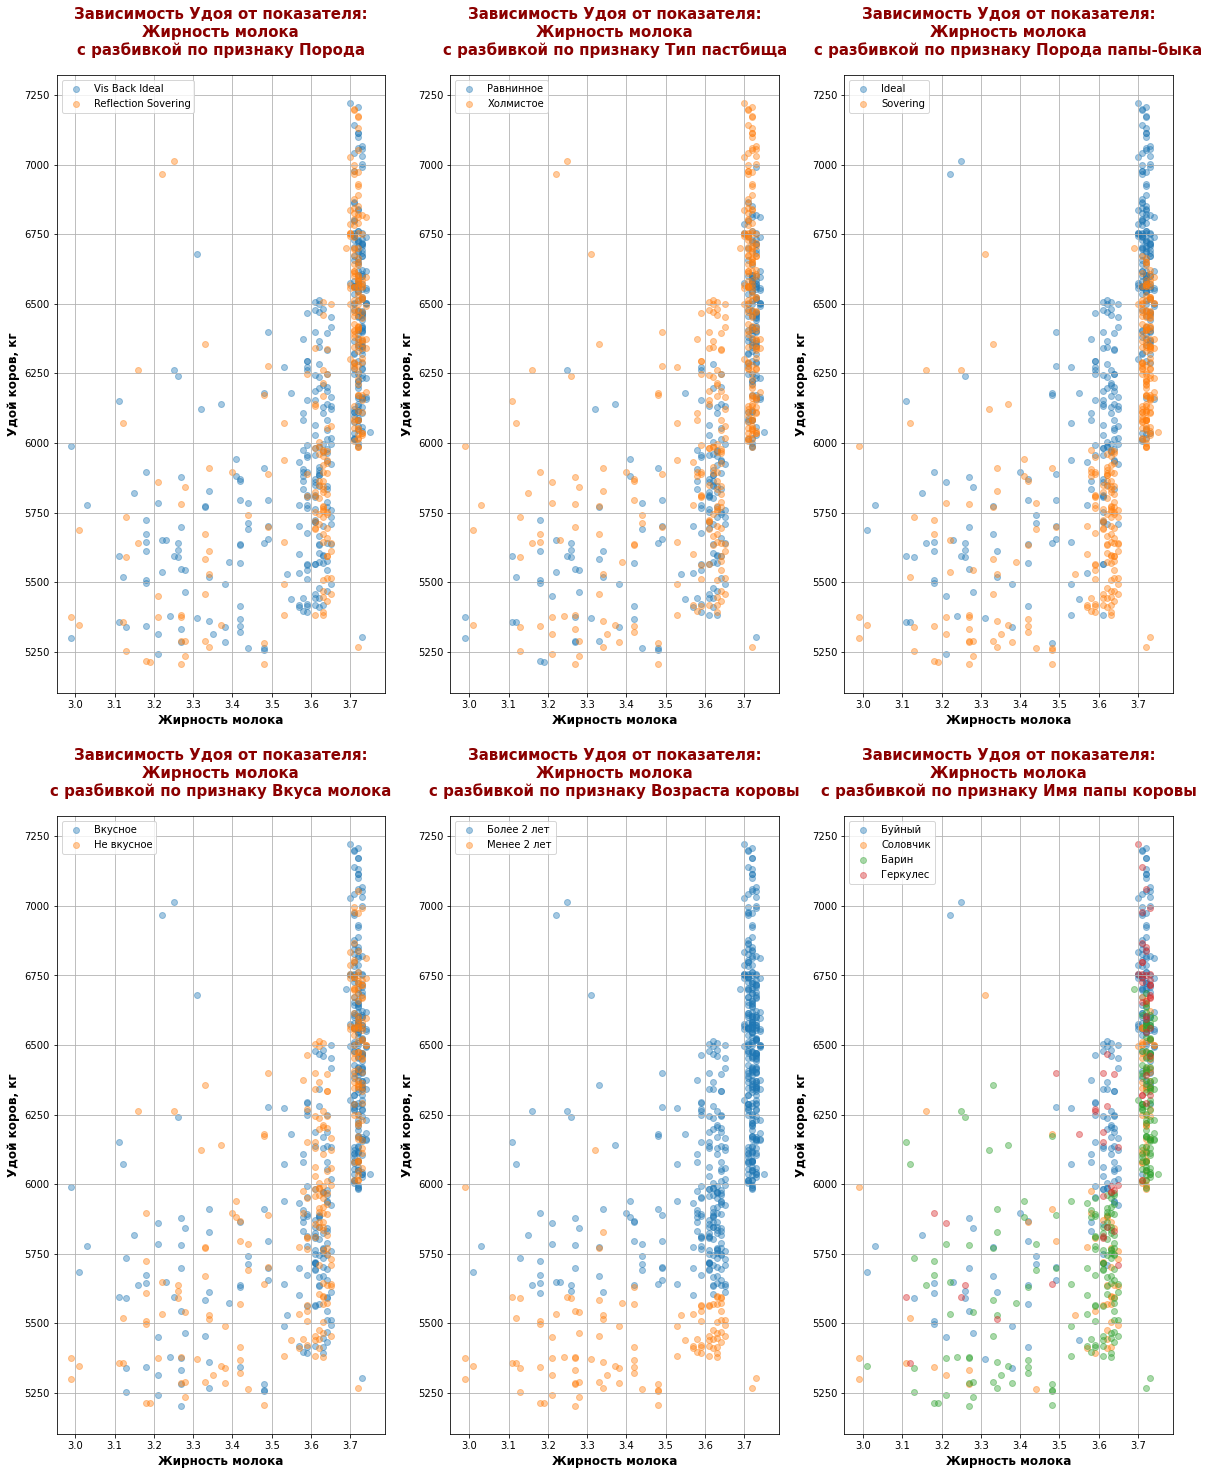

In [62]:
scatter_plots_for_cat_par(data_farm, 
                          cat_params=cat_params, 
                          parameter='fat_content', 
                          mask=mask)
plt.show()

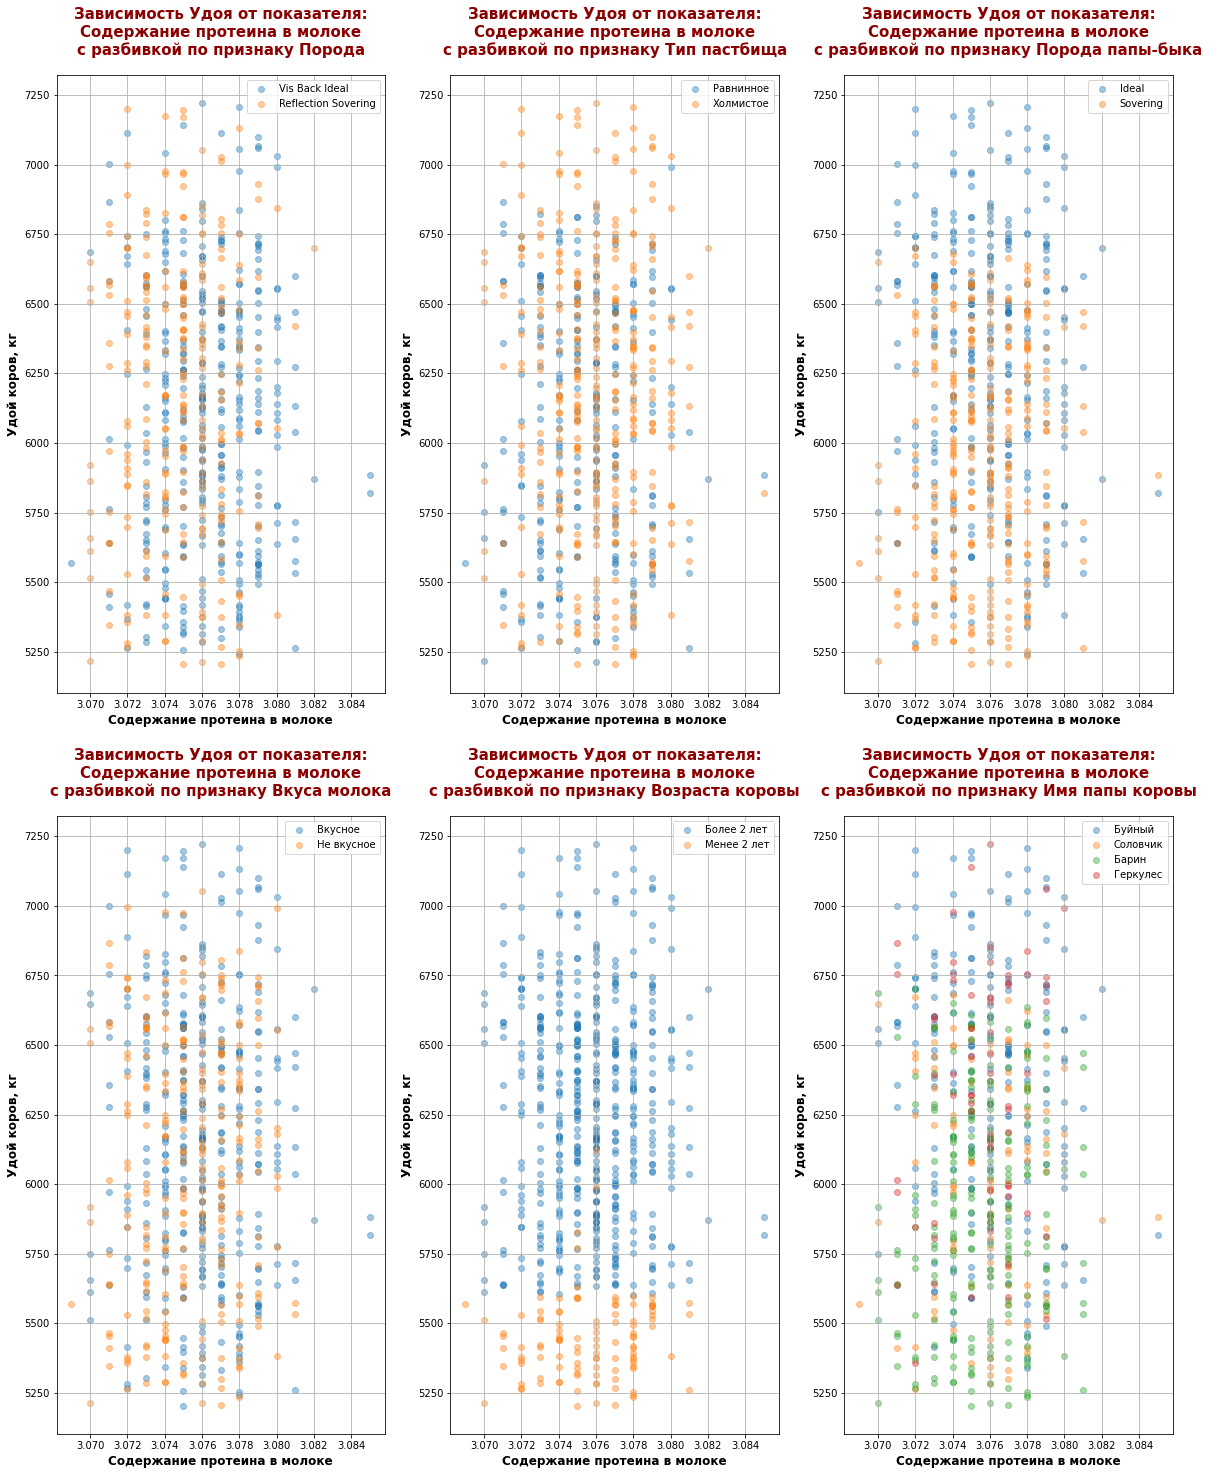

In [63]:
scatter_plots_for_cat_par(data_farm, 
                          cat_params=cat_params, 
                          parameter='protein', 
                          mask=mask)
plt.show()

<hr>
<font size=4.5><b>Итоги корреляционного анализа признаков:</b></font>




Так как параметры Удой <b>milk_yield</b> и Порода папы-быка <b>dads_bread</b> имеют заметную корреляцию, на графиках видно, что значения удоя у коров, чьи отцы породы <i>Ideal</i>, в среднем больше чем у коров, чьи отцы породы <i>Sovering</i>.

По диаграмме рассеяния признаков ЭКЕ <b>energy_feed_unit</b> и Удой <b>milk_yield</b> видно нелинейную взаимосвязь, имеющую вид очень пологой (близкой к линейному графику) ветви параболы. 

По диаграмме рассеяния признаков Содержание сырого протеина в корме <b>crude_protein</b> и Удой <b>milk_yield</b> также видно нелинейную взаимосвязь, имеющую вид очень пологой (близкой к линейному графику) ветви перевернутой параболы, при этом значения имеют больший разброс, о чем также говорит умеренный коэффициент корреляции между этими параметрами. 

По графику зависимости признаков СПО <b>sugar_protein_ratio</b> и Удой <b>milk_yield</b> видно нелинейную взаимосвязь, имеющую более очевидный вид ветви параболы.

По диаграмме рассеяния признаков Жирность молока <b>fat_content</b> и Удой <b>milk_yield</b> можно увидеть нелинейную взаимосвязь, имеющую вид ветви параболы. 

На диаграмме рассеяния признаков Содержания протеина в молоке <b>protein</b> и Удой <b>milk_yield</b> не прослеживается взаимосвязей.

Между целевым признаком Удой (<b>milk_yield</b>) и другими количественными признаками, наиболее близкую к линейной взаимосвязи имеют параметры ЭКЕ <b>energy_feed_unit</b> и Содержание сырого протеина в корме <b>crude_protein</b>. 

<hr>

 <a id='linear'></a>

## Обучение модели линейной регрессии

In [64]:
RANDOM_STATE = 1

In [65]:
def X_y_split(df: pd.DataFrame, 
              X_list: list[str], 
              y_list: list[str], 
              RANDOM_STATE: int = RANDOM_STATE) -> tuple[pd.DataFrame]:
    '''Data split into training and test samples'''
    
    X = df[X_list]
    y = df[y_list]
    return train_test_split(X, y, random_state=RANDOM_STATE)

In [66]:
def ohe_cat_params(cat_params: list[str], 
                   X_train: pd.DataFrame, 
                   X_test: pd.DataFrame, 
                   drop: str = 'first', 
                   sparse: bool = False) -> tuple[pd.DataFrame, OneHotEncoder]:
    '''Categorical parameter encoding using One hot encoder'''
    
    encoder = OneHotEncoder(drop=drop, sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_params])
    X_test_ohe = encoder.transform(X_test[cat_params])
    
    ohe_train_data = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names())
    ohe_test_data = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names())
    
    return encoder, ohe_train_data, ohe_test_data

In [67]:
def standart_quant_params(quant_params: list[str], 
                          X_train: pd.DataFrame, 
                          X_test: pd.DataFrame) -> tuple[pd.DataFrame, StandardScaler]: 
    '''Normalization of quantitative parameters using StandardScaler'''
    
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[quant_params])
    X_test_scaled = scaler.transform(X_test[quant_params])
    
    scaled_train_data = pd.DataFrame(X_train_scaled, columns=quant_params)
    scaled_test_data = pd.DataFrame(X_test_scaled, columns=quant_params)
    
    return scaler, scaled_train_data, scaled_test_data

In [68]:
def residuals_analysis(y_test: pd.DataFrame, 
                       predictions: np.ndarray) -> pd.DataFrame:
    '''Construction of residuals histogram and scatter plot '''
    
        
    residuals = y_test - predictions
    
    fig = plt.figure(figsize=(16, 8))
    
    
    fig.add_subplot(1, 2, 1)
    plt.hist(residuals, bins=20)
    plt.title('Гистограмма распределения остатков', 
              size=18, 
              weight='bold',
              color='DarkRed')
    plt.xlabel('Остатки', 
               size=12, 
               weight='bold')
    plt.grid()
    
    
    fig.add_subplot(1, 2, 2)
    plt.scatter(predictions, 
                residuals, 
                alpha=0.3)
    plt.title('Анализ дисперсии', 
              size=18, 
              weight='bold',
              color='DarkRed')
    plt.xlabel('Предсказания модели', 
               size=12, 
               weight='bold')
    plt.ylabel('Остатки', 
               size=12, 
               weight='bold')
    plt.grid()
    
    
    plt.show()
    return residuals

<hr>
<font size=4.5><b>Первая модель линейной регрессии</b></font>

В качестве входных признаков будем использовать параметры из групп характеризующих корм коров, самих коров и пастбищ, так как вероятнее всего характеристики молока (в том числе Удой) не будут зависеть напрямую дург от друга. При этом не будем учитывать возраст коров из-за коэффициента корреляции, равного единице, что говорит о прямой линейной зависимости.
<hr>

In [69]:
X_train, X_test, y_train, y_test =X_y_split(df=data_farm, 
                                            X_list=['energy_feed_unit', 
                                                    'crude_protein', 
                                                    'sugar_protein_ratio', 
                                                    'dads_breed', 
                                                    'breed', 
                                                    'pasture_type'], 
                                            y_list=['milk_yield'])

<hr>
Закодируем категориальные признаки, при этом обработаем дамми-ловушки.
<hr>

In [70]:
_, ohe_train_data, ohe_test_data = ohe_cat_params(cat_params=['dads_breed', 'breed', 'pasture_type'], 
                                                  X_train=X_train, 
                                                  X_test=X_test)
display(ohe_train_data.shape)
ohe_train_data.head()

(471, 3)

,x0_Sovering,x1_Vis Back Ideal,x2_Холмистое
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,0.0,0.0,1.0


<hr>
Теперь стандартизируем количественные признаки.
<hr>

In [71]:
_, scaled_train_data, scaled_test_data = standart_quant_params(quant_params=['energy_feed_unit', 
                                                                             'crude_protein', 
                                                                             'sugar_protein_ratio'], 
                                                               X_train=X_train, 
                                                               X_test=X_test)
display(scaled_train_data.shape)
scaled_train_data.head()

(471, 3)

,energy_feed_unit,crude_protein,sugar_protein_ratio
0,-2.639262,0.032004,-0.990585
1,-0.938302,-1.022532,-0.683128
2,0.530709,-0.311989,0.854155
3,-2.020731,-0.994336,-0.683128
4,1.071923,1.379778,0.854155


<hr>
Теперь объединим преобразованные данные и обучим модель линейной регрессии.
<hr>

In [72]:
X_train = pd.concat([scaled_train_data, ohe_train_data], axis=1)
X_test = pd.concat([scaled_test_data, ohe_test_data], axis=1)

model_lr_first = LinearRegression()
model_lr_first.fit(X_train, y_train)

LinearRegression()

<hr>
Оценим качество полученной модели на тестовой выборке, рассчитав коэффициент детерминации и проанализировав остатки с помощью графиков.
<hr>

In [73]:
predictions = model_lr_first.predict(X_test)

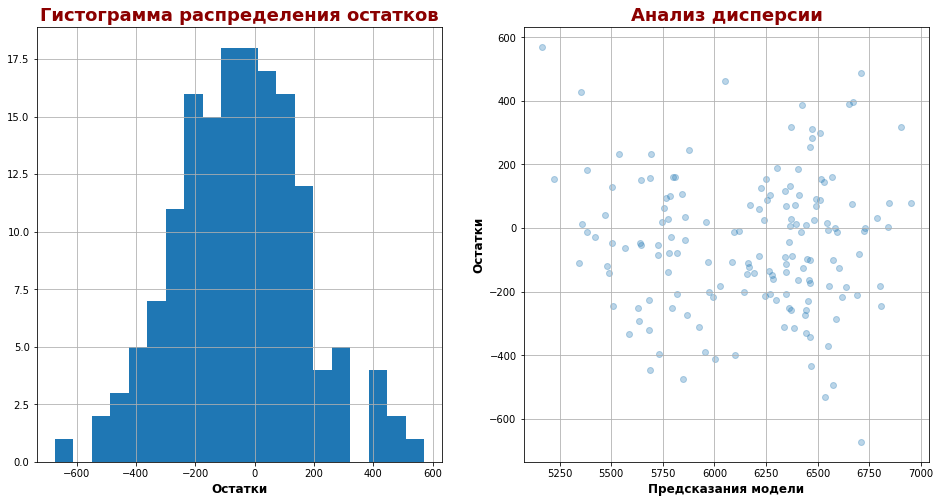

,milk_yield
count,157.000000
mean,-48.822404
std,215.689990
min,-672.460467
25%,-202.231172
50%,-48.266523
75%,87.664331
max,570.333103


In [74]:
residuals = residuals_analysis(y_test=y_test, predictions=predictions)
residuals.describe()

In [75]:
r_2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"Коэффициент детерминации R²: {r_2.round(3)}", 
      f"Среднеквадратичная ошибка: {mse.round()}", 
      f"Корень среднеквадратичной ошибки: {rmse.round(1)}", 
      f"Средняя абсолютная ошибка: {mae.round(1)}", 
      sep='\n')

Коэффициент детерминации R²: 0.77
Среднеквадратичная ошибка: 48609.0
Корень среднеквадратичной ошибки: 220.5
Средняя абсолютная ошибка: 173.9


<hr>
<font size=4.5><b>Итог обучения первой модели:</b></font>

На гистограмме распределения остатков можно увидеть, что остатки имеют вид нормального распределения, при этом смещенное влево, это говорит о том, что модель  несколько завышает предсказываемые значения. По диаграмме рассеяния остатков можно сказать, что она имеет переменную дисперсию при различных значениях предсказания модели, При значениях вблизи 5250 кг, разброс остатков достаточно большой, он снижается по мере приближения к значению 6000 кг, после чего снова увеличивается. 

Коэффициент детерминации R² получился равным 0.77. 

Так как дисперсия остатков модели имеет непостоянный характер а гистограмма распределения остатков смещена влево, рекомендуется улучшить модель. Стоит поискать дополнительные неучтенные признаки, которые могут влиять на целевой параметр или попробовать трансформировать исходные данные.
<hr>

<hr>
<font size=4.5><b>Вторая модель линейной регрессии</b></font>

Посмотрим на диаграмму рассеяния признаков СПО и Удой. Можно заметить, что они связаны нелинейно. Чтобы избавиться от этой нелинейности, преобразуем параметр СПО в категориальный бинарный признак <b>height_sugar_protein_ratio</b>, значения ниже 0.91 будут принимать значения False, а значения выше - True.
<hr>

In [76]:
data_farm.loc[data_farm['sugar_protein_ratio'] < 0.91, 'height_sugar_protein_ratio'] = False
data_farm.loc[data_farm['sugar_protein_ratio'] >= 0.91, 'height_sugar_protein_ratio'] = True

<hr>
Также можно заметить, что вазимосвязь параметров ЭКЕ и Удой имеет нелинейный характер, поэтому добавим новый параметр <b>energy_feed_unit_square</b> в котором будут значения из <b>energy_feed_unit</b>, возведенные в квадрат.
<hr>

In [77]:
data_farm['energy_feed_unit_square'] = data_farm['energy_feed_unit'] ** 2
data_farm.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,dads_breed,fat_content,protein,tasty_milk,over_to_years_old,dads_name,height_sugar_protein_ratio,energy_feed_unit_square
0,1,5863,14.2,1743,0.890,Vis Back Ideal,Равнинное,Ideal,3.58,3.076,True,True,Буйный,False,201.64
1,2,5529,12.8,2138,0.890,Vis Back Ideal,Равнинное,Sovering,3.54,3.079,True,False,Соловчик,False,163.84
2,3,5810,14.0,1854,0.885,Reflection Sovering,Холмистое,Sovering,3.59,3.074,False,True,Барин,False,196.00
3,4,5895,12.4,2012,0.885,Reflection Sovering,Холмистое,Ideal,3.40,3.075,False,True,Буйный,False,153.76
4,5,5302,12.8,1675,0.885,Vis Back Ideal,Равнинное,Sovering,3.73,3.073,True,False,Барин,False,163.84


<hr>
Далее повторим процесс подготовки данных и обучения модели. 
<hr>

In [78]:
X_train, X_test, y_train, y_test =X_y_split(df=data_farm, 
                                            X_list=['energy_feed_unit_square', 
                                                    'crude_protein', 
                                                    'height_sugar_protein_ratio', 
                                                    'dads_breed', 
                                                    'breed', 
                                                    'pasture_type'], 
                                            y_list=['milk_yield'])

In [79]:
_, ohe_train_data, ohe_test_data = ohe_cat_params(cat_params=['dads_breed', 
                                                              'breed', 
                                                              'pasture_type', 
                                                              'height_sugar_protein_ratio'], 
                                                  X_train=X_train, 
                                                  X_test=X_test)
display(ohe_train_data.shape)
ohe_train_data.head()

(471, 4)

,x0_Sovering,x1_Vis Back Ideal,x2_Холмистое,x3_True
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0


In [80]:
_, scaled_train_data, scaled_test_data = standart_quant_params(quant_params=['energy_feed_unit_square', 
                                                                             'crude_protein'], 
                                                               X_train=X_train, 
                                                               X_test=X_test)
display(scaled_train_data.shape)
scaled_train_data.head()

(471, 2)

,energy_feed_unit_square,crude_protein
0,-2.399675,0.032004
1,-0.954060,-1.022532
2,0.504212,-0.311989
3,-1.904159,-0.994336
4,1.090484,1.379778


In [81]:
X_train = pd.concat([scaled_train_data, ohe_train_data], axis=1)
X_test = pd.concat([scaled_test_data, ohe_test_data], axis=1)

model_lr_second = LinearRegression()
model_lr_second.fit(X_train, y_train)

LinearRegression()

<hr>
оценим качество полученной модели. Посчитаем коэффициент детерминации и построим графики остатков.
<hr>

In [82]:
predictions = model_lr_second.predict(X_test)

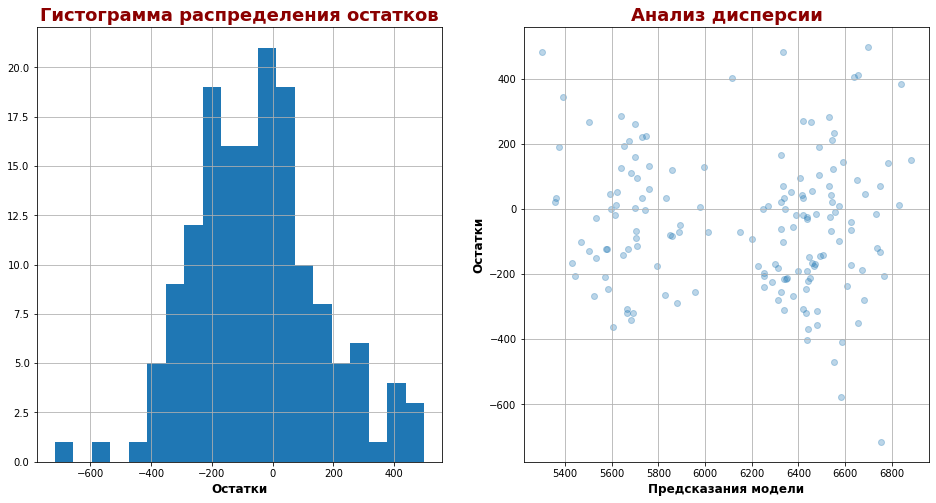

,milk_yield
count,157.000000
mean,-49.191727
std,210.324737
min,-715.926378
25%,-198.373460
50%,-56.551053
75%,69.767183
max,498.114654


In [83]:
residuals = residuals_analysis(y_test=y_test, predictions=predictions)
residuals.describe()

In [84]:
r_2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"Коэффициент детерминации R²: {r_2.round(3)}", 
      f"Среднеквадратичная ошибка: {mse.round()}", 
      f"Корень среднеквадратичной ошибки: {rmse.round(1)}", 
      f"Средняя абсолютная ошибка: {mae.round(1)}", 
      sep='\n')

Коэффициент детерминации R²: 0.781
Среднеквадратичная ошибка: 46375.0
Корень среднеквадратичной ошибки: 215.3
Средняя абсолютная ошибка: 170.0


<hr>
<font size=4.5><b>Итог обучения второй модели:</b></font>
    
Коэффициент детерминации второй модели получился равным 0.781, что больше коэффициента предыдущей модели на 0.011. 

Гистограмма распределения остатков сохранила вид нормального распределения, смещение влево также сохранилось. Диаграмма рассеяния остатков стала еще больше похожа на форму "бабочки", что также говорит о невысоком качестве получившейся модели.

В целом качество модели практически не изменилось.
<hr>

<hr>
<font size=4.5><b>Третья модель линейной регрессии</b></font>


Добавим признак Имя папы коровы <b>dads_name</b>. Попробуем убрать категориальные признаки Порода коровы и Тип пастбища, которые имеют низкую корреляционную связь с целевым признаком, а также убрать породу папы коров, которая имеет корреляцию с признаком Имя папы быка близкую к единице. На этапе корреляционного анализа, было выявлено, что связь между целевым параметром и параметром Сырой протеин, похожа на нелинейную, поэтому возведем в квадрат значения сырого протеина и добавим в новый столбец <b>crude_protein_square</b>.

<hr>

In [85]:
data_farm['crude_protein_square'] = data_farm['crude_protein'] ** 2
data_farm.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,dads_breed,fat_content,protein,tasty_milk,over_to_years_old,dads_name,height_sugar_protein_ratio,energy_feed_unit_square,crude_protein_square
0,1,5863,14.2,1743,0.890,Vis Back Ideal,Равнинное,Ideal,3.58,3.076,True,True,Буйный,False,201.64,3038049
1,2,5529,12.8,2138,0.890,Vis Back Ideal,Равнинное,Sovering,3.54,3.079,True,False,Соловчик,False,163.84,4571044
2,3,5810,14.0,1854,0.885,Reflection Sovering,Холмистое,Sovering,3.59,3.074,False,True,Барин,False,196.00,3437316
3,4,5895,12.4,2012,0.885,Reflection Sovering,Холмистое,Ideal,3.40,3.075,False,True,Буйный,False,153.76,4048144
4,5,5302,12.8,1675,0.885,Vis Back Ideal,Равнинное,Sovering,3.73,3.073,True,False,Барин,False,163.84,2805625


In [86]:
X_train, X_test, y_train, y_test =X_y_split(df=data_farm, 
                                            X_list=['energy_feed_unit_square', 
                                                    'crude_protein_square', 
                                                    'height_sugar_protein_ratio', 
                                                    'dads_name'], 
                                            y_list=['milk_yield'])

In [87]:
encoder, ohe_train_data, ohe_test_data = ohe_cat_params(cat_params=['height_sugar_protein_ratio', 
                                                                    'dads_name'], 
                                                        X_train=X_train, 
                                                        X_test=X_test)
display(ohe_train_data.shape)
ohe_train_data.head()

(471, 4)

,x0_True,x1_Буйный,x1_Геркулес,x1_Соловчик
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0


In [88]:
scaler, scaled_train_data, scaled_test_data = standart_quant_params(quant_params=['energy_feed_unit_square', 
                                                                                  'crude_protein_square'], 
                                                                    X_train=X_train, 
                                                                    X_test=X_test)
display(scaled_train_data.shape)
scaled_train_data.head()

(471, 2)

,energy_feed_unit_square,crude_protein_square
0,-2.399675,-0.013798
1,-0.954060,-0.995364
2,0.504212,-0.345002
3,-1.904159,-0.970423
4,1.090484,1.386616


In [89]:
X_train = pd.concat([scaled_train_data, ohe_train_data], axis=1)
X_test = pd.concat([scaled_test_data, ohe_test_data], axis=1)

model_lr_third = LinearRegression()
model_lr_third.fit(X_train, y_train)

LinearRegression()

In [90]:
predictions = model_lr_third.predict(X_test)

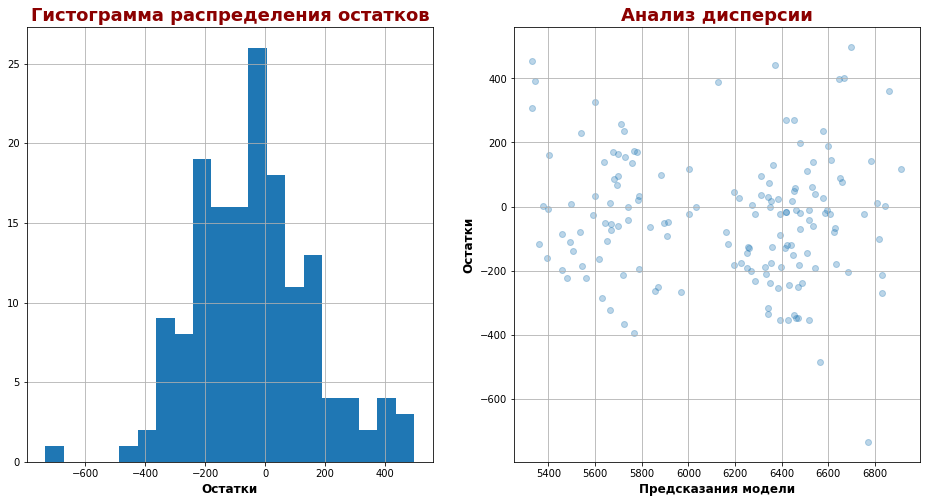

,milk_yield
count,157.000000
mean,-37.787423
std,198.653635
min,-733.866717
25%,-180.914142
50%,-25.977983
75%,74.352121
max,498.314289


In [91]:
residuals = residuals_analysis(y_test=y_test, predictions=predictions)
residuals.describe()

In [92]:
r_2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"Коэффициент детерминации R²: {r_2.round(3)}", 
      f"Среднеквадратичная ошибка: {mse.round()}", 
      f"Корень среднеквадратичной ошибки: {rmse.round(1)}", 
      f"Средняя абсолютная ошибка: {mae.round(1)}", 
      sep='\n')

Коэффициент детерминации R²: 0.808
Среднеквадратичная ошибка: 40640.0
Корень среднеквадратичной ошибки: 201.6
Средняя абсолютная ошибка: 155.7


<hr>
<font size=4.5><b>Итог обучения третьей модели:</b></font>
    
Коэффициент детерминации третьей модели увеличился на 0.027 и стал равным 0.808. 

Диаграмма рассеяния осталась прежней, сделать ее более равномерной не удалось. При прогнозировании можно учитывать, что при прогнозе в диапазоне 6000 - 6200 кг, результат будет наиболее точным.

Гистограмма распределения остатков сдвинулась вправо. Теперь в меньшем количестве случаев, прогноз будет завышенным.
<hr>

<hr>
По метрикам:  R², остаткам, MSE, MAE и RMSE - наиболее удачной моделью получилась третья. Расчитаем доверительный интервал прогноза третьей модели, для этого расчитаем квантили ошибки модели на тренировочных данных.
<hr>

In [93]:
confidence_interval = [round(int(i)) for i in st.norm.interval(0.95, loc=np.mean(predictions), scale=st.sem(predictions))]
confidence_interval

[6090, 6225]

<hr>
Границы 95% доверительного интервала: 6090 - 6225 кг.

Спрогнозируем удой коров, которых предлагает для покупки __"ЭкоФерма"__.

Добавим недостающие параметры ЭКЕ, Сырой протеин и СПО в фрейм с продаваемыми коровами, для этого возьмем среднее значение из фрейма с коровами фермера и умножим на 1.05, так как в планах технологов фермера, увеличить значения каждого из этих параметров на 5%. Далее добавим новые столбцы, аналогичные добавляемым ранее для фрема с коровами фермера.
<hr>

In [94]:
data_eco_farm['energy_feed_unit'] = data_farm['energy_feed_unit'].mean() * 1.05
data_eco_farm['crude_protein'] = data_farm['crude_protein'].mean() * 1.05
data_eco_farm['sugar_protein_ratio'] = data_farm['sugar_protein_ratio'].mean() * 1.05

In [95]:
data_eco_farm.loc[data_eco_farm['sugar_protein_ratio'] < 0.91, 'height_sugar_protein_ratio'] = False
data_eco_farm.loc[data_eco_farm['sugar_protein_ratio'] >= 0.91, 'height_sugar_protein_ratio'] = True
data_eco_farm['energy_feed_unit_square'] = data_eco_farm['energy_feed_unit'] ** 2
data_eco_farm['crude_protein_square'] = data_eco_farm['crude_protein'] ** 2

In [96]:
cat_params = ['height_sugar_protein_ratio', 'dads_name']
quant_params = ['energy_feed_unit_square', 'crude_protein_square']

eco_X_scaled = scaler.transform(data_eco_farm[quant_params])
eco_X_ohe = encoder.transform(data_eco_farm[cat_params])

scaled_eco_data = pd.DataFrame(eco_X_scaled, columns=quant_params)
ohe_eco_data = pd.DataFrame(eco_X_ohe, columns=encoder.get_feature_names())

display(scaled_eco_data.head())
ohe_eco_data.head()

,energy_feed_unit_square,crude_protein_square
0,0.566721,0.522945
1,0.566721,0.522945
2,0.566721,0.522945
3,0.566721,0.522945
4,0.566721,0.522945


,x0_True,x1_Буйный,x1_Геркулес,x1_Соловчик
0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0


In [97]:
X_eco_data = pd.concat([scaled_eco_data, ohe_eco_data], axis=1)
X_eco_data.head()

,energy_feed_unit_square,crude_protein_square,x0_True,x1_Буйный,x1_Геркулес,x1_Соловчик
0,0.566721,0.522945,1.0,0.0,1.0,0.0
1,0.566721,0.522945,1.0,1.0,0.0,0.0
2,0.566721,0.522945,1.0,0.0,0.0,0.0
3,0.566721,0.522945,1.0,1.0,0.0,0.0
4,0.566721,0.522945,1.0,1.0,0.0,0.0


In [98]:
predictions_eco_data = model_lr_third.predict(X_eco_data)

In [99]:
data_eco_farm['milk_yield_drediction'] = predictions_eco_data.round().astype(int)
data_eco_farm['milk_yield_drediction'].sort_values()

2     6321
14    6321
13    6321
8     6321
16    6332
10    6332
9     6575
15    6575
18    6575
19    6575
4     6575
3     6575
1     6575
7     6575
6     6577
11    6577
12    6577
5     6577
17    6577
0     6577
Name: milk_yield_drediction, dtype: int64

<hr>
<font size=4.5><b>Итоги прогнозирования:</b></font>

Ни одно прогнозное значение не входит в границы, определенного ранее, доверительного интервала. Все значения получились приближенными к значениям 6300 и 6570.

При этом, если посмотреть на диаграмму рассеяния остатков используемой модели, максимальная положительная ошибка для значений вблизи 6300 около 100, значит скорее всего в худшем случае Удой, значения которого около 6300, будет около 6200, что все равно удовлетворяет критерию "средний удой за год - не менее 6000 кг". 

Максимальная положительная ошибка для диапазона 6500 - 6600 около 250, вероятно даже при худшем случае Удой, значения которого около 6570, также будет удовлетворять требованию.

По получившимся результатам можно сказать, что все коровы, предлагаемые на продажу "ЭкоФермой" подходят фермеру по критерию годового удоя, при условии, что подход кормления новых коров будет изменен в соответтсвии с рекомендацией технологов.

<hr>

 <a id='logical'></a>

## Обучение модели логистической регрессии

<hr>

В качестве входных параметров будем использовать:

<i>Количественные</i>
 - ЭКЕ в квадрате - <b>energy_feed_unit_square</b>;
 - Содержание сырого протеина в корме в квадрате - <b>crude_protein_square</b>;
 - Жирность молока - <b>fat_content</b>;
 - Содержание протеина в молоке - <b>protein</b>;
 
 
<i>Качественные</i>
 - Тип пастбища - <b>pasture_type</b>;
 - Возраст коровы - <b>over_to_years_old</b>;
 - Высокое СПО - <b>height_sugar_protein_ratio</b>;
 - Порода коровы - <b>breed</b>;
 - Порода папы коровы - <b>dads_breed</b>;
 
<hr>

In [100]:
data_farm['taste'] = data_farm['tasty_milk'].astype(int)

X_train, X_test, y_train, y_test =X_y_split(df=data_farm, 
                                            X_list=['energy_feed_unit_square', 
                                                    'crude_protein_square', 
                                                    'fat_content', 
                                                    'protein', 
                                                    'pasture_type', 
                                                    'over_to_years_old', 
                                                    'height_sugar_protein_ratio', 
                                                    'breed', 
                                                    'dads_breed'], 
                                            y_list='taste')

In [101]:
encoder, ohe_train_data, ohe_test_data = ohe_cat_params(cat_params=['pasture_type', 
                                                                    'over_to_years_old', 
                                                                    'height_sugar_protein_ratio', 
                                                                    'breed', 
                                                                    'dads_breed'], 
                                                        X_train=X_train, 
                                                        X_test=X_test)
display(ohe_train_data.shape)
ohe_train_data.head()

(471, 5)

,x0_Холмистое,x1_True,x2_True,x3_Vis Back Ideal,x4_Sovering
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0


In [102]:
scaler, scaled_train_data, scaled_test_data = standart_quant_params(quant_params=['energy_feed_unit_square', 
                                                                                  'crude_protein_square', 
                                                                                  'fat_content', 
                                                                                  'protein'], 
                                                                    X_train=X_train, 
                                                                    X_test=X_test)
display(scaled_train_data.shape)
scaled_train_data.head()

(471, 4)

,energy_feed_unit_square,crude_protein_square,fat_content,protein
0,-2.399675,-0.013798,-1.724519,-0.636975
1,-0.954060,-0.995364,-2.095634,-0.636975
2,0.504212,-0.345002,0.625880,-0.250855
3,-1.904159,-0.970423,-2.652307,0.135265
4,1.090484,1.386616,0.687733,-1.409214


In [103]:
X_train = pd.concat([scaled_train_data, ohe_train_data], axis=1)
X_test = pd.concat([scaled_test_data, ohe_test_data], axis=1)

In [104]:
model_logr = LogisticRegression(random_state=RANDOM_STATE)
model_logr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [105]:
predictions = model_logr.predict(X_test)

In [106]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = model_logr.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

energy_feed_unit_square: +0.648621
crude_protein_square: +0.201292
fat_content         : -0.055208
protein             : +0.160023
x0_Холмистое        : +0.579191
x1_True             : +0.184056
x2_True             : -0.749036
x3_Vis Back Ideal   : +0.029316
x4_Sovering         : +0.141955


In [107]:
accuracy_score(predictions, y_test)

0.6305732484076433

<hr>

Построим матрицу ошибок модели и посчитаем метрики <i>recall</i> и <i>precision</i>.

<hr>

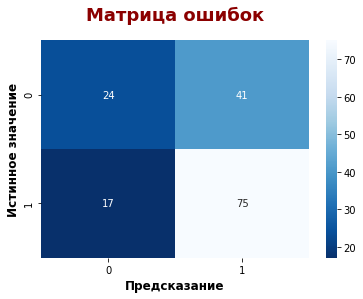

In [108]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Истинное значение', 
           size=12, 
           weight='bold')
plt.xlabel('Предсказание', 
           size=12, 
           weight='bold')
plt.title('Матрица ошибок', 
          size=18, 
          weight='bold',
          color='DarkRed', 
          pad=20)
plt.show()

In [109]:
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.815
precision:  0.647


<hr>

В случае прогнозирования выгодных покупок коров, критичнее будет ошибка первого рода, если модель будет предсказывать положительный результат (корова дает вкусное молоко), а на самом деле, он будет отрицательным (корова дает невкусное молоко). Поэтому сведем ошибку к нулю, для этого построим график зависимости ошибок первого рода от выбранного порога.

<hr>

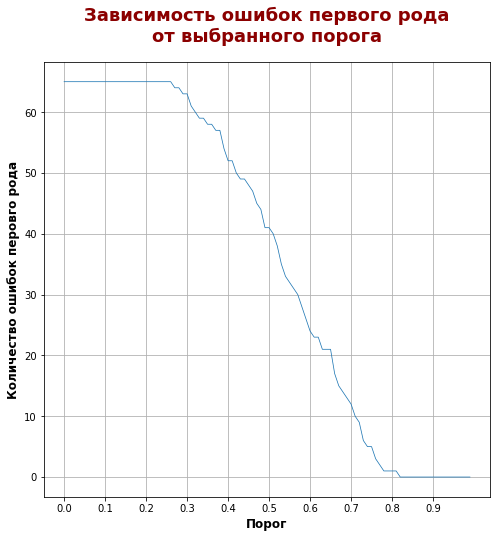

In [110]:
y_proba = model_logr.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
                    columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)


values = []

thresholds = [round(i,3) for i in np.linspace(0,1,num = 100,endpoint=False)]
for i in thresholds:
    data['y_pred_'] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
    data['check'] = data.apply(lambda row: 1 if row['y_valid'] == 0 and row['y_pred_'] == 1 else 0, 1)
    values.append(data['check'].sum())

    
plt.figure(figsize=(8, 8))
heatmap = sns.lineplot(x=thresholds, 
                       y=values, 
                       size = 50, 
                       legend=False)
plt.ylabel('Количество ошибок перовго рода', 
           size=12, 
           weight='bold')
plt.xlabel('Порог', 
           size=12, 
           weight='bold')
plt.title('Зависимость ошибок первого рода\nот выбранного порога', 
          size=18, 
          weight='bold',
          color='DarkRed', 
          pad=20)
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

<hr>

По графику видно, что ошибка первого рода сводится к нулю при значении порога 0.82, примем это значение за пороговое.

<hr>

In [111]:
y_proba = model_logr.predict_proba(X_test)[:, 1]

y_predicted_08 = [1 if prob >= 0.82 else 0 for prob in y_proba]

recall = recall_score(y_test, y_predicted_08)
precision = precision_score(y_test, y_predicted_08)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.098
precision:  1.0


<hr>

Посчитаем также метрики при порогах 0.6 и 0.71.
<br>А также посчитаем процент ошибок первого рода от общего числа предсказаний.

<hr>

In [112]:
y_proba = model_logr.predict_proba(X_test)[:, 1]

y_predicted_071 = [1 if prob >= 0.71 else 0 for prob in y_proba]

print('recall при пороге 0.71: ', round(recall_score(y_test, y_predicted_071), 3))
print('precision при пороге 0.71: ', round(precision_score(y_test, y_predicted_071), 3))

y_predicted_06 = [1 if prob >= 0.6 else 0 for prob in y_proba]

print()
print('recall при пороге 0.6: ', round(recall_score(y_test, y_predicted_06), 3))
print('precision при пороге 0.6: ', round(precision_score(y_test, y_predicted_06), 3))

recall при пороге 0.71:  0.467
precision при пороге 0.71:  0.811

recall при пороге 0.6:  0.707
precision при пороге 0.6:  0.73


In [113]:
cm_08 = confusion_matrix(y_test, y_predicted_08)
print(f"Ошибка первого рода будет приблизительно в {round(cm_08[0][1] / len(y_proba) * 100, 1)}% случаев, при пороге 0.8")
cm_071 = confusion_matrix(y_test, y_predicted_071)
print(f"Ошибка первого рода будет приблизительно в {round(cm_071[0][1] / len(y_proba) * 100, 1)}% случаев, при пороге 0.71")
cm_06 = confusion_matrix(y_test, y_predicted_06)
print(f"Ошибка первого рода будет приблизительно в {round(cm_06[0][1] / len(y_proba) * 100, 1)}% случаев, при пороге 0.6")

Ошибка первого рода будет приблизительно в 0.0% случаев, при пороге 0.8
Ошибка первого рода будет приблизительно в 6.4% случаев, при пороге 0.71
Ошибка первого рода будет приблизительно в 15.3% случаев, при пороге 0.6


<hr>

Значение <i>precision</i> после изменение порога на 0.82 равно 1, значит модель максимально точно предсказывает положительный результат (не ошибается, если предсказывает, что корова дает вкусное молоко).

Теперь предскажем вкус молока, которое будут давать коровы, которые предлагает <b>"ЭкоФерма"</b>.

<hr>

In [114]:
cat_params = ['pasture_type', 
              'over_to_years_old', 
              'height_sugar_protein_ratio', 
              'breed', 
              'dads_breed']

quant_params = ['energy_feed_unit_square', 
                'crude_protein_square', 
                'current_fat_content', 
                'current_protein']

eco_X_scaled = scaler.transform(data_eco_farm[quant_params])
eco_X_ohe = encoder.transform(data_eco_farm[cat_params])

scaled_eco_data = pd.DataFrame(eco_X_scaled, columns=quant_params)
ohe_eco_data = pd.DataFrame(eco_X_ohe, columns=encoder.get_feature_names())

In [115]:
X_eco_data = pd.concat([scaled_eco_data, ohe_eco_data], axis=1)
X_eco_data.head()

,energy_feed_unit_square,crude_protein_square,current_fat_content,current_protein,x0_Холмистое,x1_True,x2_True,x3_Vis Back Ideal,x4_Sovering
0,0.566721,0.522945,-0.178204,0.135265,1.0,1.0,1.0,1.0,0.0
1,0.566721,0.522945,-0.425614,2.065864,0.0,0.0,1.0,1.0,1.0
2,0.566721,0.522945,-0.116351,-0.636975,0.0,1.0,1.0,0.0,1.0
3,0.566721,0.522945,-1.291550,-5.656532,1.0,1.0,1.0,0.0,0.0
4,0.566721,0.522945,0.192912,-0.636975,0.0,1.0,1.0,0.0,0.0


In [116]:
proba_eco_data = model_logr.predict_proba(X_eco_data)[:, 1]

In [117]:
data_eco_farm['taste_08'] = [1 if prob >= 0.8 else 0 for prob in proba_eco_data]
data_eco_farm['taste_071'] = [1 if prob >= 0.71 else 0 for prob in proba_eco_data]
data_eco_farm['taste_06'] = [1 if prob >= 0.6 else 0 for prob in proba_eco_data]


print('Количество коров, дающих вкусное молоко, при пороге 0.82: ', data_eco_farm['taste_08'].sum())
print('Количество коров, дающих вкусное молоко, при пороге 0.71: ', data_eco_farm['taste_071'].sum())
print('Количество коров, дающих вкусное молоко, при пороге 0.6: ', data_eco_farm['taste_06'].sum())

Количество коров, дающих вкусное молоко, при пороге 0.82:  0
Количество коров, дающих вкусное молоко, при пороге 0.71:  1
Количество коров, дающих вкусное молоко, при пороге 0.6:  7


<hr>
<font size=4.5><b>Итоги прогнозирования:</b></font>
    
По предсказанным значениям, с полной уверенностью нельзя сказать, что хотя бы одна корова будет давать вкусное молоко, по меркам фермера.

Общая точность модели, <i>Accuracy</i>, получилась не очень хорошей - всего 63.1%, возможно при ее увеличении, модель при значении <i>precision</i> = 1.0 предскажет положительный результат для продаваемых коров.

Можно купить 1 коров, если принять риск 6.4% для каждой коровы, что она будет давать невкусное молоко.
<br>Можно купить 7 коров, если принять риск примерно 15.3% для каждой коровы, что она будет давать невкусное молоко.


<hr>

 <a id='conclusion'></a>

## Итоговые выводы

In [118]:
data_eco_farm.loc[(data_eco_farm['milk_yield_drediction'] >= 6000) & (data_eco_farm['taste_08'] == 1), :].shape[0]

0

In [119]:
data_eco_farm.loc[(data_eco_farm['milk_yield_drediction'] >= 6000) & (data_eco_farm['taste_071'] == 1), :].shape[0]

1

In [120]:
data_eco_farm.loc[(data_eco_farm['milk_yield_drediction'] >= 6000) & (data_eco_farm['taste_06'] == 1), :].shape[0]

7

<hr>

В данной работе были изучены коровы, уже имеющиеся у владельца молочного хозяйства __"Вольный луг"__, а также коровы, которые предлагает ассоциация пастбищ __"ЭкоФерма"__ на продажу. 

В результате выполнения работы спрогнозированны значения параметров годового удоя продаваемых коров и оценки вкуса их молока. Прогнозирование было выполнено с использованием моделей <u>линейной регрессии</u> - прогнозирование <b>удоя</b>; и <u>логистической регрессии</u> - прогнозирование <b>вкуса молока</b>.


<br><br><br>
<u>Оценка качества линейной регрессионной модели</u> производилась по метрикам: 

 - Коэффициент детерминации R² (основная метрика);
 - Среднеквадратичная ошибка;
 - Корень среднеквадратичной ошибки;
 - Средняя абсолютная ошибка;
 - Анализ остатков;
 
<u>Оценка качества логистической регрессионной модели</u> производилась по метрикам: 

 - Общая точность <i>accuracy</i>;
 - Точность ошибки первого рода <i>precision</i> (основная метрика);
 - Точность ошибки второго рода <i>recall</i>.
 - Матрица ошибок;
 


<br><br><br>
Для улучшения качества моделей были отобраны парметры без прямых линейных связей - коэффициент корреляции более 0.95. <br>Параметрами, по которыми совершалось прогнозирование модели <u>линейной</u> регрессии, приняты:
 - ЭКЕ в квадрате <i>energy_feed_unit_square</i>*;
 - Содержание сырого протеина в корме в квадрате <i>crude_protein_square</i>*;
 - Высокое СПО <i>height_sugar_protein_ratio</i>**;
 - Имя папы коровы <i>dads_name</i>;
 

<br>Параметрами, по которыми совершалось прогнозирование модели <u>логистической</u> регрессии, приняты:
 - ЭКЕ в квадрате <i>energy_feed_unit_square</i>*;
 - Содержание сырого протеина в корме в квадрате <i>crude_protein_square</i>*;
 - Жирность молока <i>fat_content</i></font>;
 - Содержание протеина в молоке <i>protein</i>;
 - Высокое СПО <i>height_sugar_protein_ratio</i>**;
 - Тип пастбища <i>pasture_type</i>;
 - Возраст коровы <i>over_to_years_old</i>;
 - Порода коровы <i>breed</i>;
 - Порода папы коровы <i>dads_breed</i>;
 
\* - Значения параметров предварительно были возведены в квадрат для устранения нелинейных связей.
<br>\** - Параметр был изменен на категориальный для исключения нелинейности взаимосвязей.


<br><br><br>
У моделей были получены следующие итоговые метрики качества:

<i>Линейная регрессия</i>
 - Коэффициент детерминации R² = 0.808.

<i>Логистическая регрессия</i>
 - precision = 1.0 при пороге 0.82;
 - precision = 0,81 при пороге 0.71;
 - precision = 0.73 при пороге 0.6;
 - accuracy = 63.1%.


<br><br><br>
Общая точность модели логистической регрессии достаточно небольшая - 63.1%. При ее увеличении возможно получится добиться более благоприятных прогнозов. Для улучшения модели можно провести настройку гиперпараметров модели, но такие технологии мы еще не проходили, а если попробовать разобраться самому, боюсь я совсем выйду из графика).

<br><br><br>
Спрогнозированный параметр удоя у всех продаваемых коров удовлетворяет требованиям фермера. По коэффициенту детерминации можно сказать, что в 80% случаев модель предскажет верное значение удоя молока новых коров, при этом, даже если прогноз будет ошибочным, по дисперсии остатков можно заметить, что даже в случае ошибки удой будет не менее 6 тонн молока в год, так как есть запас у предсказанных значений, который компенсирует максимальную ошибку, которую может допустить модель.


При точности <i>precision</i> равной единице, все коровы дают "невкусное" молоко. 
<br>Таким образом, если требуется покупка без рисков, не стоит покупать предлагаемых коров.
<br>При риске покупки коров, каждая из которых имеет шанс примерно <b>6.4%</b>, что она будет давать невкусное молоко, можно купить <b>1</b> коров.
<br>При риске покупки коров, каждая из которых имеет шанс примерно <b>15.3%</b>, что она будет давать невкусное молоко, можно купить <b>7</b> коров.

<hr>